<center><h1> Portfolio Project </h1></center>
<center><h2> Freddie Mac </h2></center>
<center><h2> Identifying Delinquent Loans </h2></center>

<center><h3> STUDENT : RICARDO ALAMO SALGADO </h3></center>

# Table of Contents
1. [Installing Libraries](#1.Installing-libraries)
2. [Initial EDA](#2.Initial-EDA)
3. [Cleaning Dates and Date EDA](#3.Cleaning-Dates-and-Date-EDA)
4. [Numeric Data EDA](#4.Numeric-Data-EDA)
5. [Categorical Values EDA](#5.Categorical-Values-EDA)
6. [Reviewing null values](#6.Reviewing-null-values)
7. [Preprocessor](#7.Preprocessor)
8. [Score Metric](#8.Score-Metric)
9. [Baseline Model - Logistic Regression](#9.Baseline-Model---Logistic-Regression)
10. [Ensemble-Models & Stacking](#10.Ensemble-Models-&-Stacking)
11. [LIME Local Explanations](#11.LIME---Local-Explanations)
12. [Deep Learning](#12.Deep-Learning) 
13.[Conclusion](#13.Conclusion)
14.[Saving Model](#14.Saving-Model)
15.[Bonus](#15.Bonus)
16.[Glossary Terms](#16.Glossary-Terms)

# 0.Objective and About Freddie Mac

#### What is Freddie Mac?
- Freddie Mac was chartered by Congress in 1970 to support the U.S. housing finance system and to help ensure a reliable and affordable supply of mortgage funds across the country. Rather than lending directly to borrowers, Freddie Mac operates in the U.S. secondary mortgage market, buying loans that meet our standards from approved lenders. Those lenders are then, in turn, able to provide more loans to qualified borrowers and keep capital flowing into the housing market. Freddie Mac then pools the mortgages it buys into securities, which they sell to investors around the world.
- Our continuous support, in good economic conditions and bad, and in markets that might otherwise be underserved, provides stability to the housing market and helps families rent, buy and keep homes they can afford.

- Source: https://www.freddiemac.com/about

#### Role and previous attempts
- The role that I am playing is that Freddie mac has requested a ML model that tries to identify what loans could be defaulting, in that way it can price those risks when buying the securities and get a fair deal. This is crucial since Freddie mac is trying to keep the mortgage market healthy for all US citizens who want to buy a property. 

- A good industry standard to follow is available from Turiel, J. & Aste, T. (2019) who are researchers at the University College London & Gower St, Bloomsbury Department of Computer Science. They recommend a LR for rejecting loans with a recall score of 77.4%. Source: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3417122

#### Objective.
- Get the best recall with a ML model to predict Delinquent loans. The goal is for Freddie mac to buy at the correct price mortgage pools with the risk expected. To check why recall is the best metric go to: [Score Metric](#8.Score-Metric)


# 1. Installing libraries  
[Back to top](#Table-of-Contents)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport
import numpy as np

Installing all transformes

In [4]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.datasets import fetch_datasets
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc

Installing all models and validations tools 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, recall_score
from sklearn.preprocessing import RobustScaler
import random

Stacking, Voting and Lime

In [244]:
from sklearn.ensemble import VotingClassifier
from mlxtend.plotting import plot_decision_regions
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import StackingClassifier

Deep Learning

In [653]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.layers import Dropout

Save Model

In [832]:
from joblib import dump

In [6]:
df= pd.read_csv("C:\\Users\\Richard\\Documents\\We Cloud Data\\Personal Project\\Credit Lending\\archive\\loan_level_500k.csv")

In [7]:
df.head(10)

CREDIT_SCORE  FIRST_PAYMENT_DATE FIRST_TIME_HOMEBUYER_FLAG  MATURITY_DATE  \
0         669.0              200206                         N         202901   
1         732.0              199904                         N         202903   
2         679.0              200208                         N         202902   
3         721.0              200209                         N         202902   
4         618.0              200210                         N         202902   
5         738.0              200211                         N         202903   
6         761.0              200211                         N         202904   
7         707.0              200211                         N         202903   
8         760.0              200211                         N         202903   
9         691.0              200302                         N         202901   

   METROPOLITAN_STATISTICAL_AREA  MORTGAGE_INSURANCE_PERCENTAGE  \
0                            NaN                            0.0   
1                        17140.0                            0.0   
2                        15940.0                           30.0   
3                        38060.0                            0.0   
4                        10420.0                           25.0   
5                        10420.0                            0.0   
6                            NaN                            0.0   
7                        33340.0                            0.0   
8                        33340.0                            0.0   
9                        15940.0                            0.0   

   NUMBER_OF_UNITS OCCUPANCY_STATUS  ORIGINAL_COMBINED_LOAN_TO_VALUE  \
0              1.0                O                             80.0   
1              1.0                O                             25.0   
2              1.0                O                             91.0   
3              1.0                O                             39.0   
4              1.0                O                             85.0   
5              1.0                O                             73.0   
6              1.0                O                             73.0   
7              1.0                O                             60.0   
8              1.0                O                             63.0   
9              1.0                O                             65.0   

   ORIGINAL_DEBT_TO_INCOME_RATIO  ...  PROPERTY_TYPE  POSTAL_CODE  \
0                           33.0  ...             SF      26100.0   
1                           10.0  ...             SF      45200.0   
2                           48.0  ...             SF      44700.0   
3                           13.0  ...             SF      85200.0   
4                           24.0  ...             SF      44200.0   
5                           44.0  ...             SF      44300.0   
6                           31.0  ...             PU      29500.0   
7                           57.0  ...             SF      53000.0   
8                           30.0  ...             SF      53000.0   
9                           25.0  ...             SF      44700.0   

   LOAN_SEQUENCE_NUMBER LOAN_PURPOSE ORIGINAL_LOAN_TERM NUMBER_OF_BORROWERS  \
0          F199Q1000004            P                320                 2.0   
1          F199Q1000005            N                360                 1.0   
2          F199Q1000007            P                319                 1.0   
3          F199Q1000013            N                318                 2.0   
4          F199Q1000015            N                317                 2.0   
5          F199Q1000016            P                317                 2.0   
6          F199Q1000017            P                318                 2.0   
7          F199Q1000018            C                317                 2.0   
8          F199Q1000019            N                317                 2.0   
9          F199Q1000023            P     

In [9]:
df_copy= df.copy()

In [10]:
df_copy

CREDIT_SCORE  FIRST_PAYMENT_DATE FIRST_TIME_HOMEBUYER_FLAG  \
0              669.0              200206                         N   
1              732.0              199904                         N   
2              679.0              200208                         N   
3              721.0              200209                         N   
4              618.0              200210                         N   
...              ...                 ...                       ...   
500132         774.0              200203                       NaN   
500133         689.0              200203                       NaN   
500134         798.0              200203                       NaN   
500135         791.0              200203                       NaN   
500136         773.0              200203                       NaN   

        MATURITY_DATE  METROPOLITAN_STATISTICAL_AREA  \
0              202901                            NaN   
1              202903                        17140.0   
2              202902                        15940.0   
3              202902                        38060.0   
4              202902                        10420.0   
...               ...                            ...   
500132         203202                        33460.0   
500133         203202                        10580.0   
500134         203202                        19780.0   
500135         203202                        42044.0   
500136         203202                            NaN   

        MORTGAGE_INSURANCE_PERCENTAGE  NUMBER_OF_UNITS OCCUPANCY_STATUS  \
0                                 0.0              1.0                O   
1                                 0.0              1.0                O   
2                                30.0              1.0                O   
3                                 0.0              1.0                O   
4                                25.0              1.0                O   
...                               ...              ...              ...   
500132                            0.0              1.0                O   
500133                            0.0              1.0                O   
500134                            0.0              1.0                O   
500135                            0.0              1.0                O   
500136                            0.0              1.0                O   

        ORIGINAL_COMBINED_LOAN_TO_VALUE  ORIGINAL_DEBT_TO_INCOME_RATIO  ...  \
0                                  80.0                           33.0  ...   
1                                  25.0                           10.0  ...   
2                                  91.0                           48.0  ...   
3                                  39.0                           13.0  ...   
4                                  85.0                           24.0  ...   
...                                 ...                            ...  ...   
500132                             61.0                           38.0  ...   
500133                             70.0                           39.0  ...   
500134                             56.0                           41.0  ...   
500135                             26.0                           18.0  ...   
500136                             33.0                           48.0  ...   

        PROPERTY_TYPE  POSTAL_CODE  LOAN_SEQUENCE_NUMBER LOAN_PURPOSE  \
0                  SF      26100.0          F199Q1000004            P   
1                  SF      45200.0          F199Q1000005            N   
2                  SF      44700.0          F199Q1000007            P   
3                  SF      85200.0          F199Q1000013            N   
4                  SF      44200.0          F199Q1000015            N   
...               ...          ...                   ...          ...   
500132             SF      55400.0          F102Q1125986            C   
500133             SF      12300.0          F102Q1125989    

# 2.Initial EDA
[Back to top](#Table-of-Contents)

In [ ]:
df_copy= df.copy()

In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CREDIT_SCORE                      497426 non-null  float64       
 1   FIRST_PAYMENT_DATE                500137 non-null  datetime64[ns]
 2   FIRST_TIME_HOMEBUYER_FLAG         369578 non-null  object        
 3   MATURITY_DATE                     500137 non-null  datetime64[ns]
 4   METROPOLITAN_STATISTICAL_AREA     429988 non-null  float64       
 5   MORTGAGE_INSURANCE_PERCENTAGE     449089 non-null  float64       
 6   NUMBER_OF_UNITS                   500134 non-null  float64       
 7   OCCUPANCY_STATUS                  500137 non-null  object        
 8   ORIGINAL_COMBINED_LOAN_TO_VALUE   500124 non-null  float64       
 9   ORIGINAL_DEBT_TO_INCOME_RATIO     485208 non-null  float64       
 10  ORIGINAL_UPB                    

In [690]:
df.isna().sum()
# Plenty of nulls for several columns we will review how to impute each in another section

CREDIT_SCORE                          2711
FIRST_PAYMENT_DATE                       0
FIRST_TIME_HOMEBUYER_FLAG           130559
MATURITY_DATE                            0
METROPOLITAN_STATISTICAL_AREA        70149
MORTGAGE_INSURANCE_PERCENTAGE        51048
NUMBER_OF_UNITS                          3
OCCUPANCY_STATUS                         0
ORIGINAL_COMBINED_LOAN_TO_VALUE         13
ORIGINAL_DEBT_TO_INCOME_RATIO        14929
ORIGINAL_UPB                             0
ORIGINAL_LOAN_TO_VALUE                   9
ORIGINAL_INTEREST_RATE                   0
CHANNEL                                  0
PREPAYMENT_PENALTY_MORTGAGE_FLAG      5178
PRODUCT_TYPE                             0
PROPERTY_STATE                           0
PROPERTY_TYPE                           95
POSTAL_CODE                             31
LOAN_SEQUENCE_NUMBER                     0
LOAN_PURPOSE                             0
ORIGINAL_LOAN_TERM                       0
NUMBER_OF_BORROWERS                    247
SELLER_NAME

In [12]:
df.describe()

CREDIT_SCORE  FIRST_PAYMENT_DATE  MATURITY_DATE  \
count  497426.000000       500137.000000  500137.000000   
mean      712.536212       200025.430952  203023.195872   
std        54.791262          109.815541     110.384189   
min       300.000000       199901.000000  202402.000000   
25%       676.000000       199904.000000  202903.000000   
50%       719.000000       200005.000000  203004.000000   
75%       756.000000       200105.000000  203104.000000   
max       839.000000       201103.000000  204101.000000   

       METROPOLITAN_STATISTICAL_AREA  MORTGAGE_INSURANCE_PERCENTAGE  \
count                  429988.000000                  449089.000000   
mean                    30777.824739                       7.744532   
std                     11333.401144                      12.046546   
min                     10180.000000                       0.000000   
25%                     19740.000000                       0.000000   
50%                     33340.000000                       0.000000   
75%                     40420.000000                      18.000000   
max                     49740.000000                      55.000000   

       NUMBER_OF_UNITS  ORIGINAL_COMBINED_LOAN_TO_VALUE  \
count    500134.000000                    500124.000000   
mean          1.028890                        76.053571   
std           0.218391                        15.139986   
min           1.000000                         6.000000   
25%           1.000000                        70.000000   
50%           1.000000                        80.000000   
75%           1.000000                        88.000000   
max           4.000000                       180.000000   

       ORIGINAL_DEBT_TO_INCOME_RATIO   ORIGINAL_UPB  ORIGINAL_LOAN_TO_VALUE  \
count                  485208.000000  500137.000000           500128.000000   
mean                       32.917541  136493.484785               75.710714   
std                        11.111800   60968.743066               14.937717   
min                         1.000000    8000.000000                6.000000   
25%                        25.000000   89000.000000               70.000000   
50%                        33.000000  126000.000000               80.000000   
75%                        41.000000  176000.000000               85.000000   
max                        65.000000  578000.000000              100.000000   

       ORIGINAL_INTEREST_RATE    POSTAL_CODE  ORIGINAL_LOAN_TERM  \
count           500137.000000  500106.000000       500137.000000   
mean                 7.182687   55490.857138          359.855470   
std                  0.579941   29505.382259            1.908251   
min                  4.625000     600.000000          301.000000   
25%                  6.875000   30500.000000          360.000000   
50%                  7.000000   54200.000000          360.000000   
75%                  7.375000   85000.000000          360.000000   
max                 11.500000   99900.000000          362.000000   

       NUMBER_OF_BORROWERS  
count        499890.000000  
mean              1.630295  
std               0.482725  
min               1.000000  
25%               1.000000  
50%               2.000000  
75%               2.000000  
max               2.000000

In [13]:
df_copy.corr()

CREDIT_SCORE  FIRST_PAYMENT_DATE  \
CREDIT_SCORE                         1.000000           -0.000300   
FIRST_PAYMENT_DATE                  -0.000300            1.000000   
MATURITY_DATE                       -0.001920            0.988963   
METROPOLITAN_STATISTICAL_AREA        0.016676           -0.011570   
MORTGAGE_INSURANCE_PERCENTAGE       -0.190952           -0.111815   
NUMBER_OF_UNITS                      0.007313            0.002212   
ORIGINAL_COMBINED_LOAN_TO_VALUE     -0.210789            0.010631   
ORIGINAL_DEBT_TO_INCOME_RATIO       -0.128033            0.071659   
ORIGINAL_UPB                         0.009643            0.156844   
ORIGINAL_LOAN_TO_VALUE              -0.214151           -0.004609   
ORIGINAL_INTEREST_RATE              -0.122670            0.044506   
POSTAL_CODE                          0.014719           -0.020769   
ORIGINAL_LOAN_TERM                  -0.012645           -0.040244   
NUMBER_OF_BORROWERS                 -0.030621           -0.029314   
PREPAID                              0.112380           -0.014662   
DELINQUENT                          -0.178501            0.009041   

                                 MATURITY_DATE  METROPOLITAN_STATISTICAL_AREA  \
CREDIT_SCORE                         -0.001920                       0.016676   
FIRST_PAYMENT_DATE                    0.988963                      -0.011570   
MATURITY_DATE                         1.000000                      -0.011385   
METROPOLITAN_STATISTICAL_AREA        -0.011385                       1.000000   
MORTGAGE_INSURANCE_PERCENTAGE        -0.109469                      -0.041456   
NUMBER_OF_UNITS                       0.003148                      -0.008772   
ORIGINAL_COMBINED_LOAN_TO_VALUE       0.012745                      -0.059243   
ORIGINAL_DEBT_TO_INCOME_RATIO         0.073343                       0.014227   
ORIGINAL_UPB                          0.155778                       0.064125   
ORIGINAL_LOAN_TO_VALUE               -0.002518                      -0.058589   
ORIGINAL_INTEREST_RATE                0.047287                      -0.015651   
POSTAL_CODE                          -0.016621                       0.186465   
ORIGINAL_LOAN_TERM                    0.104213                       0.002456   
NUMBER_OF_BORROWERS                  -0.031758                       0.028505   
PREPAID                              -0.014300                       0.032260   
DELINQUENT                            0.010220                      -0.029334   

                                 MORTGAGE_INSURANCE_PERCENTAGE  \
CREDIT_SCORE                                         -0.190952   
FIRST_PAYMENT_DATE                                   -0.111815   
MATURITY_DATE                                        -0.109469   
METROPOLITAN_STATISTICAL_AREA                        -0.041456   
MORTGAGE_INSURANCE_PERCENTAGE                         1.000000   
NUMBER_OF_UNITS                                      -0.034431   
ORIGINAL_COMBINED_LOAN_TO_VALUE                       0.638657   
ORIGINAL_DEBT_TO_INCOME_RATIO                         0.097074   
ORIGINAL_UPB                                         -0.068632   
ORIGINAL_LOAN_TO_VALUE                                0.662085   
ORIGINAL_INTEREST_RATE                                0.121640   
POSTAL_CODE                                          -0.039082   
ORIGINAL_LOAN_TERM                                    0.012991   
NUMBER_OF_BORROWERS                                  -0.043094   
PREPAID                                              -0.054462   
DELINQUENT                                            0.087967   

                                 NUMBER_OF_UNITS  \
CREDIT_SCORE                            0.007313   
FIRST_PAYMENT_DATE                      0.002212   
MATURITY_DATE                           0.003148   
METROPOLITAN_STATISTICAL_AREA          -0.008772   
MORTGAGE_INSURANCE_PERCENTAGE          -0.034431   
NUMBER_OF_UNITS                         1.0000

### 2.1 Label
- Highly imbalance data just 3.5% of the total customers are delinquent.

In [696]:
df['DELINQUENT'].value_counts(normalize=True)

False    0.964028
True     0.035972
Name: DELINQUENT, dtype: float64

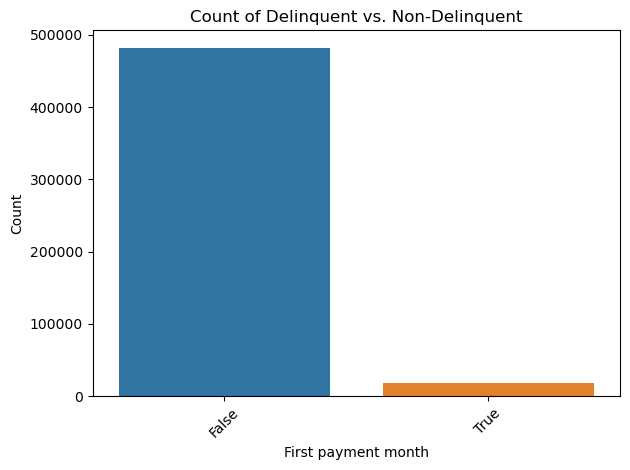

In [697]:
sns.countplot(x='DELINQUENT', data=df)
plt.title('Count of Delinquent vs. Non-Delinquent')
plt.xlabel('First payment month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

### 2.1 Correlations
- From here we can conclude that the majority of values show no significant correlations except the following:
    - First_Payment with Maturity which is logical since they are related dates.
    - ORIGINAL COMBINED LOAN-TO-VALUE (CLTV) is calculated from Original Loan to Value that is why the are correlated
    - Prepaid should not be part of the Final model as Prepaid means the customer had paid in advance the mortgagen however there are not completely negative correlated, more analysis is needed.
    - Strong correlation between Mortgage insurance and Original Loan to Value, which is also a requirement. If customers is requiring a loan closer to 100% of the property the mortgage insurance will also increase.
    - Mortgage insurance is typically required when the loan-to-value (LTV) ratio of a home loan is greater than 80%. This means that the borrower is financing more than 80% of the value of the property, which increases the risk for the lender and that is why they are correlated

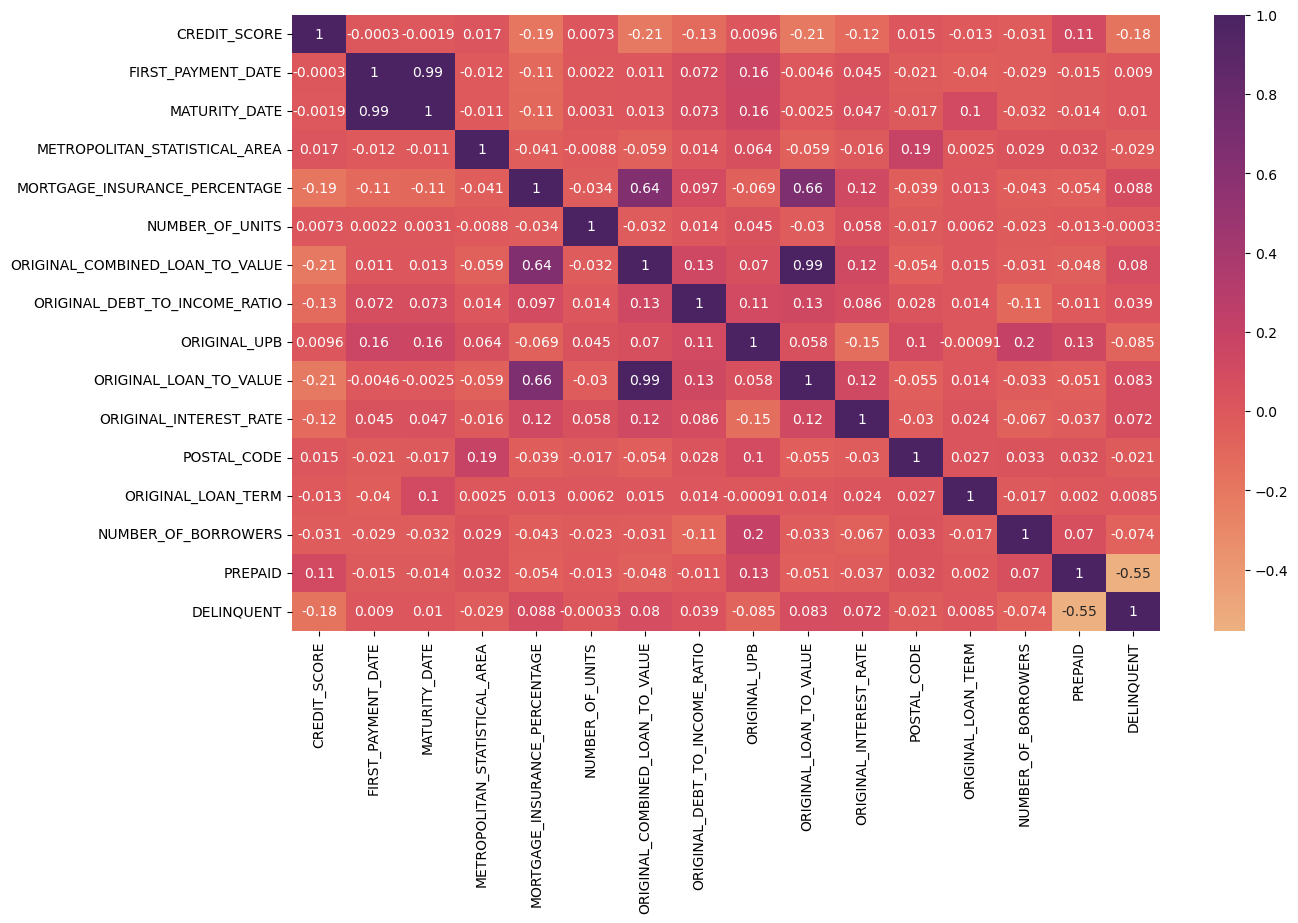

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(df_copy.corr(),annot=True, cmap='flare');


# 3.Cleaning Dates and Date EDA
[Back to top](#Table-of-Contents)

In [15]:
df['FIRST_PAYMENT_DATE'].head()

0    200206
1    199904
2    200208
3    200209
4    200210
Name: FIRST_PAYMENT_DATE, dtype: int64

### 3.1 Creating Functions to clean dates and create month and year columns

In [16]:
def clean_dates(df, column_name):
    ''' This method only works with date format YYYYMM'''
    df['temp']= df[column_name].astype(str).str[0:4]+ '-' + df[column_name].astype(str).str[4:]
    df[column_name]= pd.to_datetime(df['temp'],format='%Y-%m')

In [17]:
def create_year_month(df, column_name):
    ''' This method creates year and month column and add them in the adata frame with a suffix _y and _m'''
    df[column_name+'_y']= df[column_name].dt.year
    df[column_name+'_m']=df[column_name].dt.month

In [18]:
clean_dates(df, 'MATURITY_DATE')

In [19]:
clean_dates(df, 'FIRST_PAYMENT_DATE')

In [20]:
create_year_month(df,'FIRST_PAYMENT_DATE')

In [21]:
create_year_month(df,'MATURITY_DATE')

In [24]:
### Rewiewing that columns were created in the correct format
df[['MATURITY_DATE_y', 'MATURITY_DATE_m','FIRST_PAYMENT_DATE_y', 'FIRST_PAYMENT_DATE_m']].head()

MATURITY_DATE_y  MATURITY_DATE_m  FIRST_PAYMENT_DATE_y  \
0             2029                1                  2002   
1             2029                3                  1999   
2             2029                2                  2002   
3             2029                2                  2002   
4             2029                2                  2002   

   FIRST_PAYMENT_DATE_m  
0                     6  
1                     4  
2                     8  
3                     9  
4                    10

### 3.2 Year Data EDA

### First Payment year
- The year when the loan was originated. Data shows predominant values from 1999 to 2002.

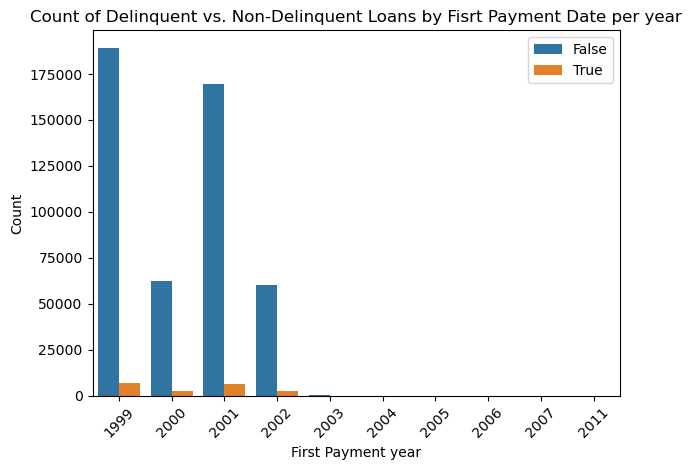

In [25]:
sns.countplot(x='FIRST_PAYMENT_DATE_y', data=df, hue='DELINQUENT')
plt.title('Count of Delinquent vs. Non-Delinquent Loans by Fisrt Payment Date per year')
plt.legend(loc= 'upper right')
plt.xlabel('First Payment year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

### First Payment month
- The month when the first payment was done. Data shows predominant values from March to May.

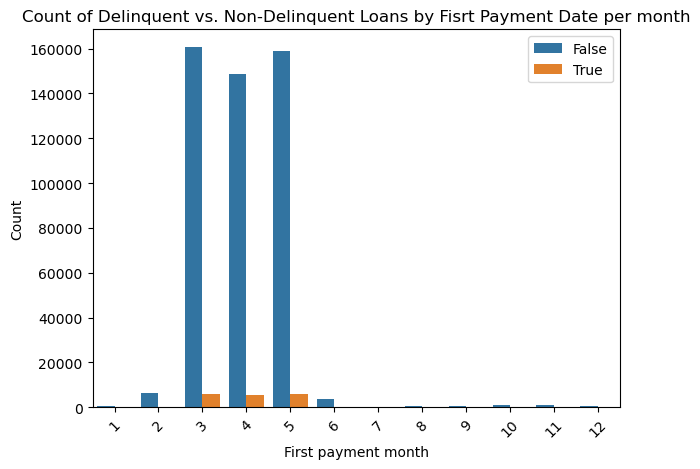

In [26]:
sns.countplot(x='FIRST_PAYMENT_DATE_m', data=df, hue='DELINQUENT')
plt.title('Count of Delinquent vs. Non-Delinquent Loans by Fisrt Payment Date per month')
plt.legend(loc= 'upper right')
plt.xlabel('First payment month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

###  Maturity Date Year
- End year of original loan term.

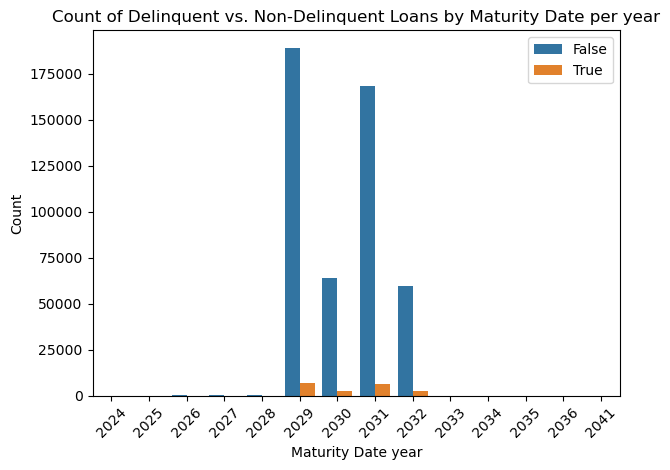

In [27]:
sns.countplot(x='MATURITY_DATE_y', data=df, hue='DELINQUENT')
plt.title('Count of Delinquent vs. Non-Delinquent Loans by Maturity Date per year')
plt.legend(loc= 'upper right')
plt.xlabel('Maturity Date year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

###  Maturity Date Month
- End month of original loan.

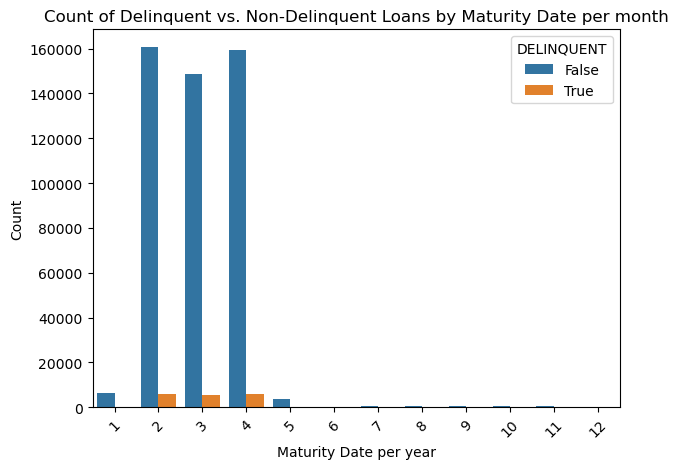

In [28]:
sns.countplot(x='MATURITY_DATE_m', data=df, hue='DELINQUENT')
plt.title('Count of Delinquent vs. Non-Delinquent Loans by Maturity Date per month')
plt.xlabel('Maturity Date per year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

###  Loan Term
- The great majority of loans are 360 months or 30 years, which is true for bot delinquent and not delinquent

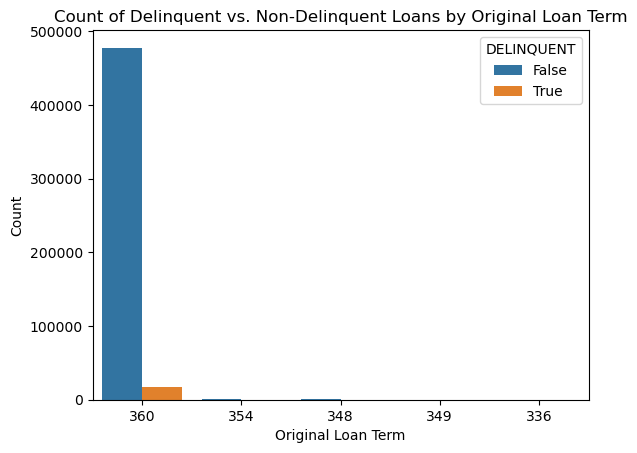

In [30]:

sorted_loan_term= df.groupby('ORIGINAL_LOAN_TERM').count()['DELINQUENT'].sort_values(ascending=False).index.tolist()[0:5]
sns.countplot(x='ORIGINAL_LOAN_TERM', data=df, hue='DELINQUENT',order=sorted_loan_term)
plt.title('Count of Delinquent vs. Non-Delinquent Loans by Original Loan Term')
plt.xlabel('Original Loan Term')
plt.ylabel('Count')
plt.show()

# 4.Numeric Data EDA
[Back to top](#Table-of-Contents)

### Credit Score
- A number, prepared by third parties, summarizing the borrower’s creditworthiness, which may be indicative of the likelihood that the borrower will timely repay future obligations
- We can clearly see that Delinquent clients had a lower credit score than non-delinquent clients
- Median and Quartiles are lowr than non-delinquent customers

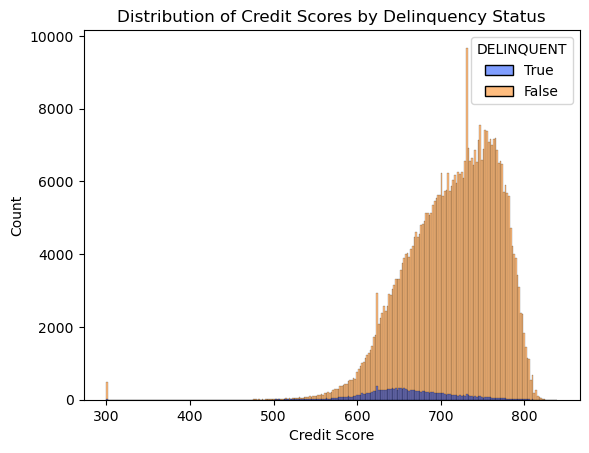

In [31]:
hue_order = list(df['DELINQUENT'].unique())[::-1]
sns.histplot(x='CREDIT_SCORE', data=df, hue='DELINQUENT',palette='bright',hue_order=hue_order)
plt.title('Distribution of Credit Scores by Delinquency Status')
plt.xlabel('Credit Score')
plt.ylabel('Count');

            Quartile 0.25  Quartile 0.5  Quartile 0.75
DELINQUENT                                            
False               678.0         721.0          757.0
True                628.0         658.0          696.0


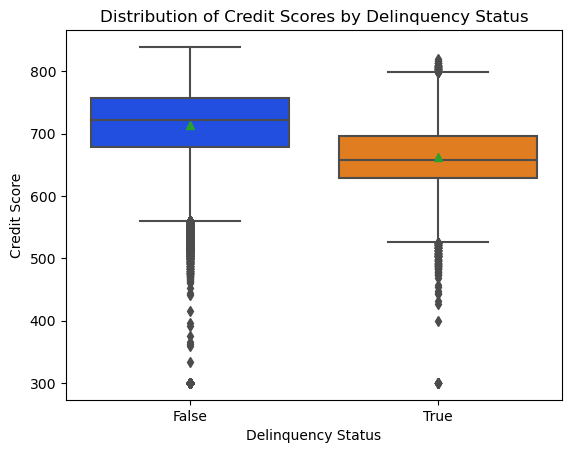

In [32]:
sns.boxplot(x='DELINQUENT',y='CREDIT_SCORE', data=df,palette='bright', showmeans=True)
plt.title('Distribution of Credit Scores by Delinquency Status')
plt.xlabel('Delinquency Status')
plt.ylabel('Credit Score');
print(df.groupby(['DELINQUENT'])['CREDIT_SCORE'].quantile([0.25,0.5,0.75]).unstack(level=-1).add_prefix('Quartile '))


### Mortgage Insurance Percentage.
- The percentage of loss coverage on the loan, at the time of Freddie Mac’s purchase of the mortgage loan that a mortgage insurer is providing to cover losses incurred as a result of a default on the loan.
- We can see that the coverage for Delinquent customer is greater which make sense since they have greater risk.


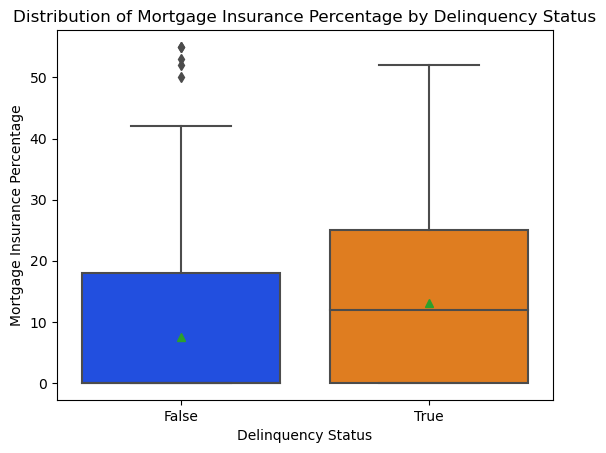

In [33]:
sns.boxplot(x='DELINQUENT',y='MORTGAGE_INSURANCE_PERCENTAGE', data=df,palette='bright', showmeans=True)
plt.title('Distribution of Mortgage Insurance Percentage by Delinquency Status')
plt.xlabel('Delinquency Status')
plt.ylabel('Mortgage Insurance Percentage');



### Original Combine Loan to Value
- the ratio is obtained by dividing the original mortgage loan amount on the note date plus any secondary mortgage loan amount disclosed by the Seller by the mortgaged property’s appraised value on the note date

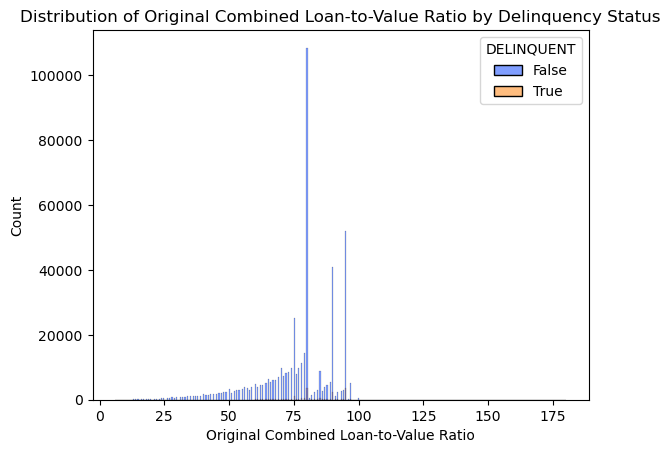

In [34]:
sns.histplot(x="ORIGINAL_COMBINED_LOAN_TO_VALUE", data=df,palette='bright', hue='DELINQUENT')
plt.title('Distribution of Original Combined Loan-to-Value Ratio by Delinquency Status')
plt.xlabel('Original Combined Loan-to-Value Ratio')
plt.ylabel('Count');
#Delinquent is not visible on an histplot

- Here we can see that Deliquents have a higher combined loand to value, meaning that the appraisal was closet to 100% of the combined mortgages of the customers. A higher percentage here means a more riskier loan.

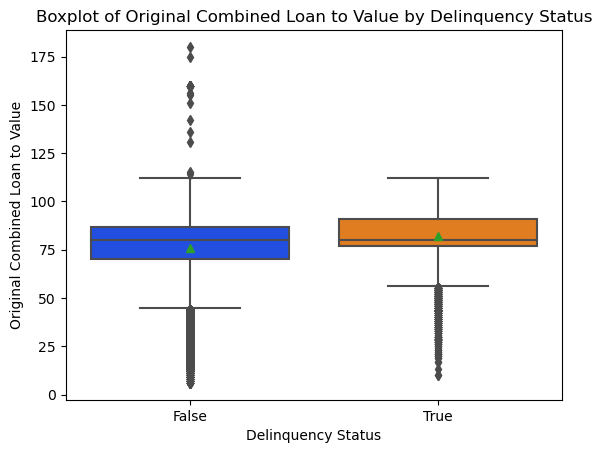

In [35]:
sns.boxplot(x='DELINQUENT',y='ORIGINAL_COMBINED_LOAN_TO_VALUE', data=df,palette='bright', showmeans=True)
plt.title("Boxplot of Original Combined Loan to Value by Delinquency Status")
plt.xlabel("Delinquency Status")
plt.ylabel("Original Combined Loan to Value");


### Debt to income ratio
- Disclosure of the debt to income ratio is based on: borrower's monthly debt payments divided by the total monthly income used to underwrite the loan as of the date of the origination of the such loan.
- Similar to combined loand to value the Debt to Income ration are an important metric on how risky is the loan and we can see clearly that Delinquent customers have a higher Debt to income ratio although not by much.

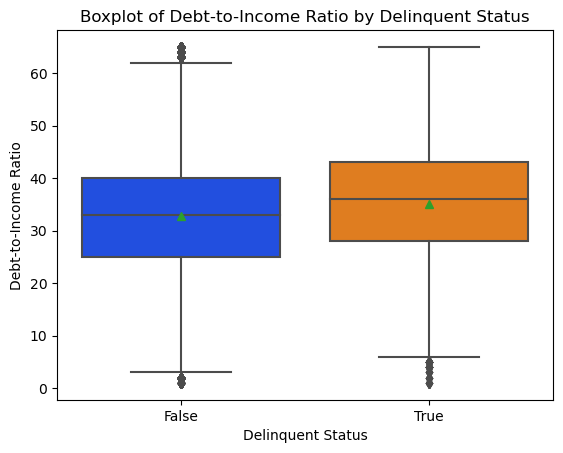

In [36]:
sns.boxplot(x='DELINQUENT',y='ORIGINAL_DEBT_TO_INCOME_RATIO', data=df,palette='bright', showmeans=True)
plt.title('Boxplot of Debt-to-Income Ratio by Delinquent Status')
plt.xlabel('Delinquent Status')
plt.ylabel('Debt-to-Income Ratio');



###  UPB 
- UPB stands for "unpaid principal balance", which is the amount of principal remaining on a loan that has not yet been paid back
- In this case, we can see that delinquent customers, on average, purchased less expensive homes and also give less downpayment.

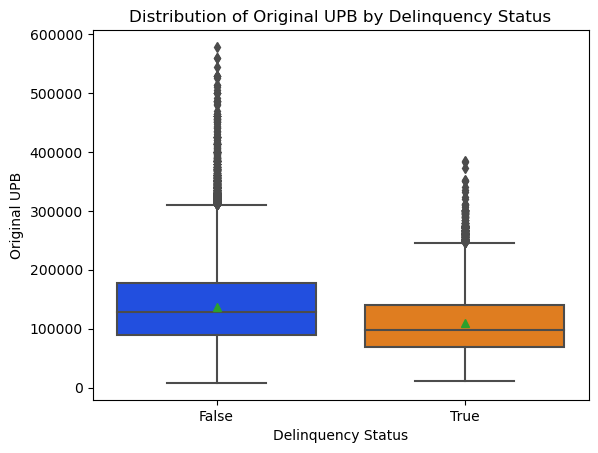

In [37]:
sns.boxplot(x='DELINQUENT',y='ORIGINAL_UPB', data=df,palette='bright', showmeans=True)
plt.title('Distribution of Original UPB by Delinquency Status')
plt.xlabel('Delinquency Status')
plt.ylabel('Original UPB');



### ORIGINAL LOAN-TO-VALUE (LTV) 
- In the case of a purchase mortgage loan, the ratio obtained by dividing the original mortgage loan amount on the note date by the lesser of the mortgaged property’s appraised value on the note date or its purchase price
- Similar to other variables, the appraisal of the house is closer to 100% for delinquent customers this makes the loan riskier

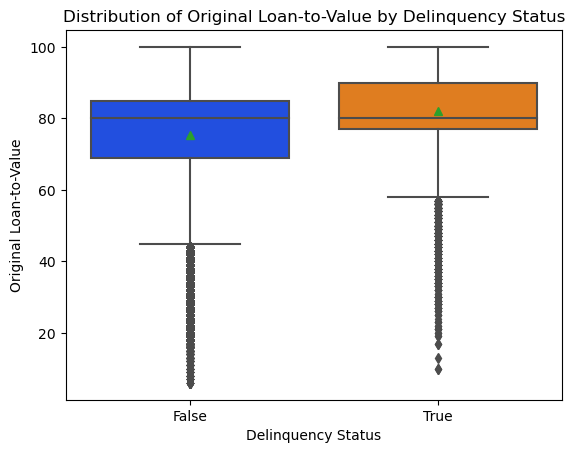

In [38]:
sns.boxplot(x='DELINQUENT',y='ORIGINAL_LOAN_TO_VALUE', data=df,palette='bright', showmeans=True)
plt.title('Distribution of Original Loan-to-Value by Delinquency Status')
plt.xlabel('Delinquency Status')
plt.ylabel('Original Loan-to-Value');


###  ORIGINAL INTEREST RATE
- Loan Interest Rate
- Greater variance in Delinquent customers. 
- This is expected as they are riskier customer however the .25 quartile is the same as the not delinquent customers which was not expected. Delinquent customers had higher credit scores that should reflect higher interest rates.


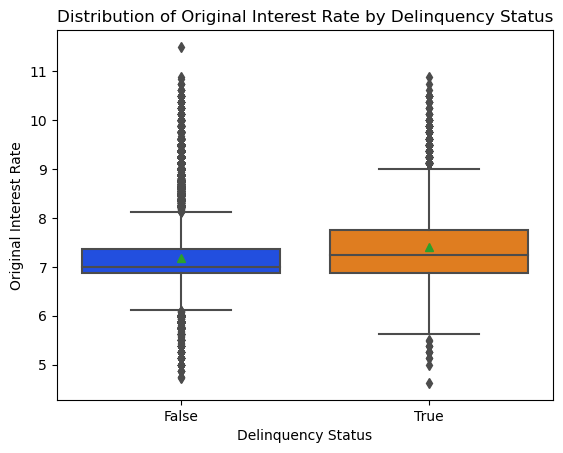

In [39]:
sns.boxplot(x='DELINQUENT',y='ORIGINAL_INTEREST_RATE', data=df,palette='bright', showmeans=True)
plt.title('Distribution of Original Interest Rate by Delinquency Status')
plt.xlabel('Delinquency Status')
plt.ylabel('Original Interest Rate');



# 5.Categorical Values EDA
[Back to top](#Table-of-Contents)

### FIRST TIME HOMEBUYER 
- Label to identify if it is the first customer property.
- Percentahe between Firstime Homebuyers who are delinquent is almost the same. 
- For that reason this variable could not be important to the model

                                      Percentage
FIRST_TIME_HOMEBUYER_FLAG DELINQUENT            
N                         False        96.393149
                          True          3.606851
Y                         False        96.167616
                          True          3.832384


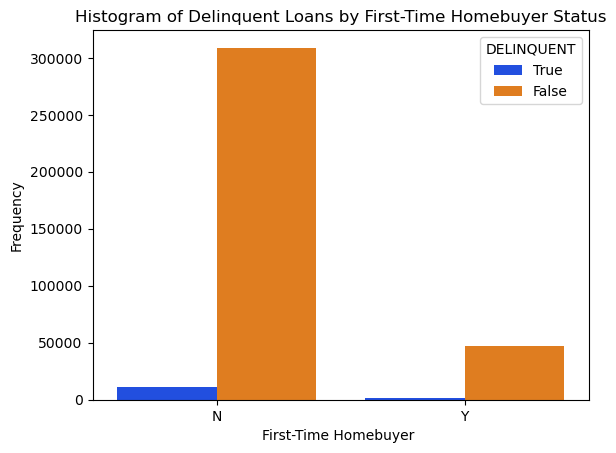

In [40]:
print(df.groupby(['FIRST_TIME_HOMEBUYER_FLAG','DELINQUENT'])[['FIRST_TIME_HOMEBUYER_FLAG']].count().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).rename(columns={'FIRST_TIME_HOMEBUYER_FLAG': 'Percentage'}))
sns.countplot(x='FIRST_TIME_HOMEBUYER_FLAG', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False]);
plt.title('Histogram of Delinquent Loans by First-Time Homebuyer Status')
plt.xlabel('First-Time Homebuyer ')
plt.ylabel('Frequency')
plt.show()



### NUMBER OF UNITS
- Denotes whether the mortgage is a one-, two-, three-, or four-unit property
- Majority of homes of loans are just 1 unit which is logical since the data is for single family homes.

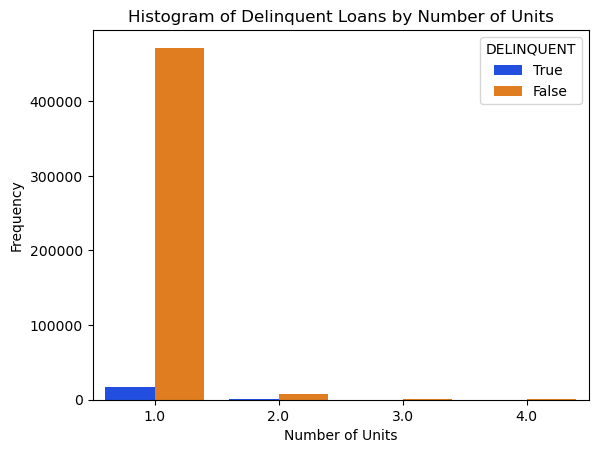

In [41]:
sns.countplot(x='NUMBER_OF_UNITS', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False])
plt.title('Histogram of Delinquent Loans by Number of Units')
plt.xlabel('Number of Units')
plt.ylabel('Frequency');


### METROPOLITAN_STATISTICAL_AREA
- Metropolitan Statistical Areas (MSAs) are defined by the United States Office of Management and Budget (OMB) and have at least one urbanized area with a population of 50,000 or more inhabitants.
- The top 20 MSA have different proportion of Delinquent and not delinquent customers which can be useful for the model.

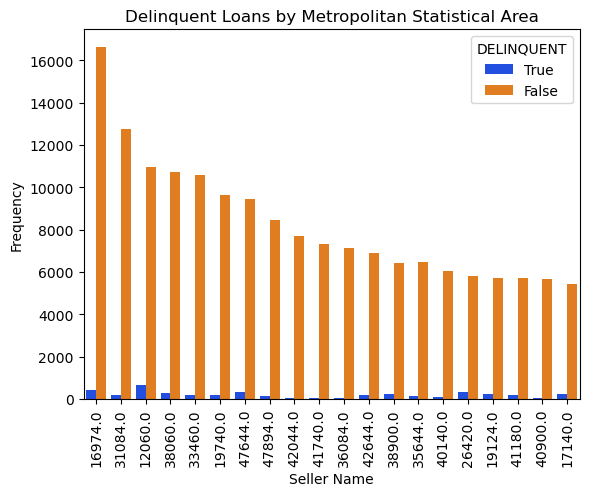

In [44]:
sns.countplot(x='METROPOLITAN_STATISTICAL_AREA', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False],
             order=df['METROPOLITAN_STATISTICAL_AREA'].value_counts().sort_values(ascending=False).index[:20])
plt.title('Delinquent Loans by Metropolitan Statistical Area')
plt.xlabel('Seller Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90);




### OCCUPANCY STATUS
- Denotes whether the mortgage type is owner occupied, second home, or investment property.
- Majority of homes of loans are just 1 unit which is logical since the data is for single family homes.
- Bigger defaults for investment properties than Secondary or Occupied by owner

                             Percentage
OCCUPANCY_STATUS DELINQUENT            
I                False        95.255856
                 True          4.744144
O                False        96.405241
                 True          3.594759
S                False        97.945254
                 True          2.054746


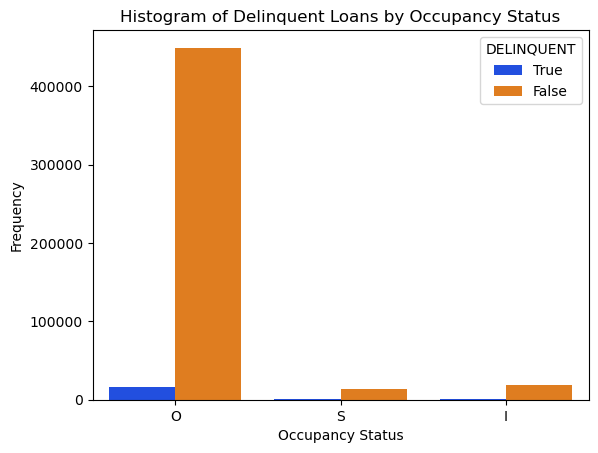

In [45]:
print(df.groupby(['OCCUPANCY_STATUS','DELINQUENT'])[['OCCUPANCY_STATUS']].count().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).rename(columns={'OCCUPANCY_STATUS': 'Percentage'}))
sns.countplot(x='OCCUPANCY_STATUS', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False])
plt.title('Histogram of Delinquent Loans by Occupancy Status')
plt.xlabel('Occupancy Status')
plt.ylabel('Frequency');




### CHANNEL
-  R = Retail,  B = Broker, C = Correspondent, T = TPO Not Specified

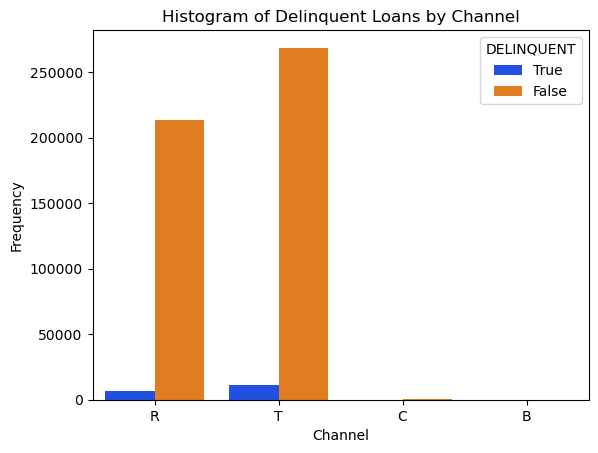

In [46]:
sns.countplot(x='CHANNEL', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False]);
plt.title('Histogram of Delinquent Loans by Channel')
plt.xlabel('Channel')
plt.ylabel('Frequency');


# Not a clear difference in delinquency between type of channels



### PREPAYMENT PENALTY
- Obligated to pay a penalty in the event of certain repayments of principal
- Not a clear difference in Deliquency. Majority of loans do not gave a prepayment penalty.

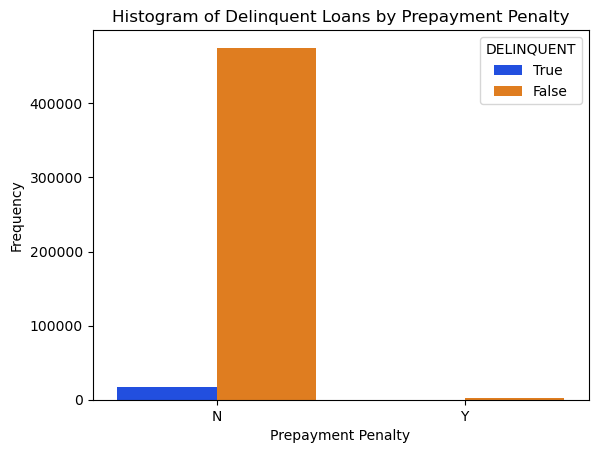

In [47]:
sns.countplot(x='PREPAYMENT_PENALTY_MORTGAGE_FLAG', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False]);
plt.title('Histogram of Delinquent Loans by Prepayment Penalty')
plt.xlabel('Prepayment Penalty')
plt.ylabel('Frequency');


### PRODUCT TYPE

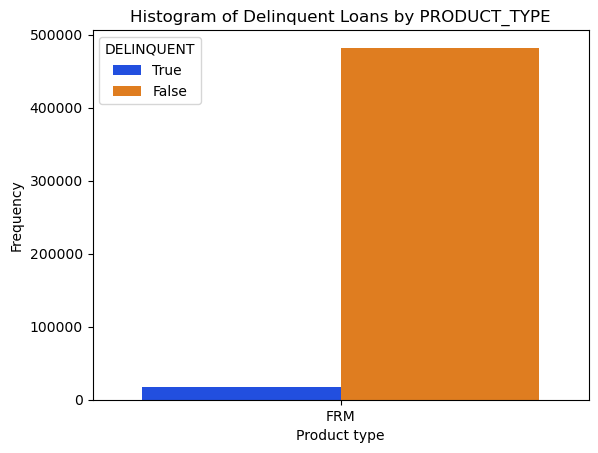

In [48]:
sns.countplot(x='PRODUCT_TYPE', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False]);
plt.title('Histogram of Delinquent Loans by PRODUCT_TYPE')
plt.xlabel('Product type')
plt.ylabel('Frequency');

# Just one type of loan not valuable for the model

### PROPERTY STATE
- US State code
- Some States have a bigger proportion of Delinquent customers which is in line with MSA data

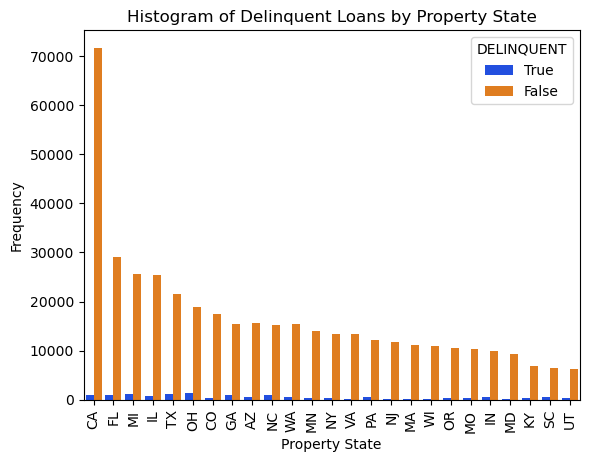

In [49]:
sns.countplot(x='PROPERTY_STATE', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False],
             order=df['PROPERTY_STATE'].value_counts().sort_values(ascending=False).index[:25])
plt.title('Histogram of Delinquent Loans by Property State')
plt.xlabel('Property State')
plt.ylabel('Frequency');
plt.xticks(rotation=90);


### Property Type
- Denotes whether the property type secured by the mortgage is a condominium, leasehold, planned unit development (PUD), cooperative share, manufactured home, or Single-Family home.
    - CO = Condo
    - PU = PUD
    - MH = Manufactured
- Housing
    - SF = Single-Family
    - CP = Co-op
- Majority of Property are single family homes but Manufactured Homes show a significant portion of delinquent 
- Please see chart below without SF for a clearer picture.

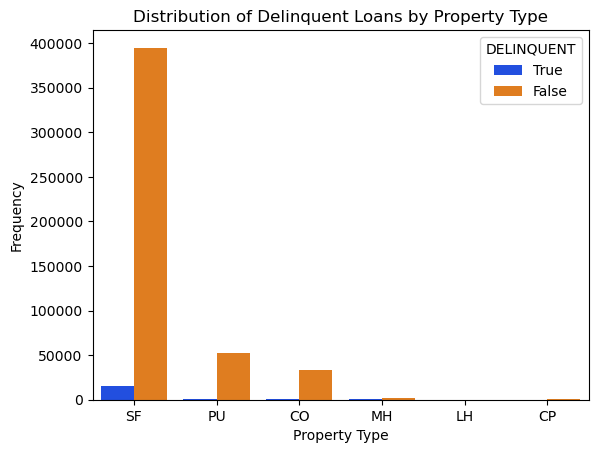

In [50]:
sns.countplot(x='PROPERTY_TYPE', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False])
plt.title('Distribution of Delinquent Loans by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Frequency');



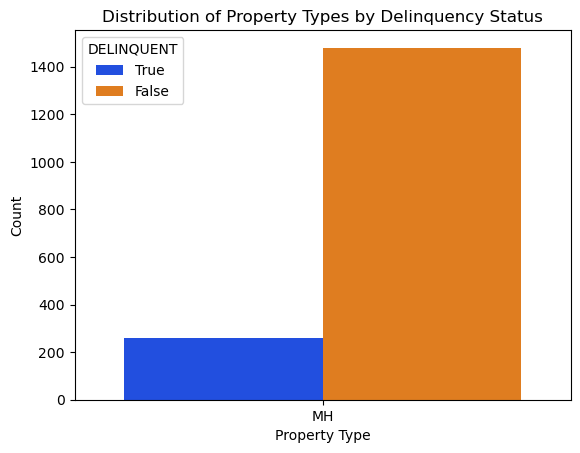

In [51]:
#MH has a significant bigger proportion of delinquent customers
sns.countplot(x='PROPERTY_TYPE', data=df[df['PROPERTY_TYPE'] =='MH'], hue='DELINQUENT',palette='bright',hue_order=[True,False])
plt.title('Distribution of Property Types by Delinquency Status')
plt.xlabel('Property Type')
plt.ylabel('Count');


### POSTAL CODE
- This chart only shows the to 25 postal codes.
- We can see than some postal codes have a greater proportion of delinquent customers.

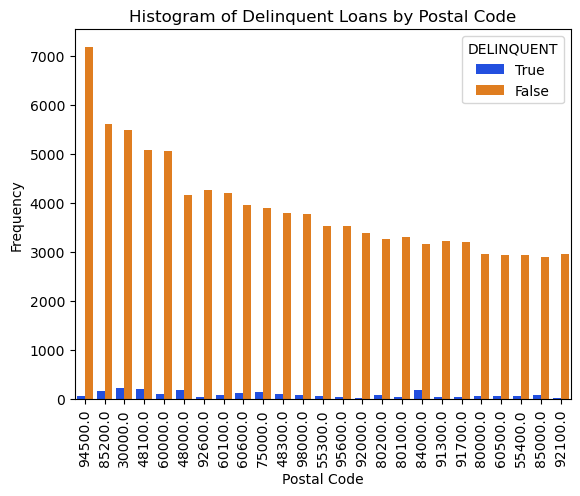

In [52]:
sns.countplot(x='POSTAL_CODE', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False],
             order=df['POSTAL_CODE'].value_counts().sort_values(ascending=False).index[:25])
plt.title('Histogram of Delinquent Loans by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Frequency')
plt.xticks(rotation=90);



### LOAN PURPOSE 
- Indicates whether the mortgage loan is a Cashout Refinance mortgage, No Cash-out Refinance mortgage, or a Purchase mortgage.
    - Cash-out Refinance mortgage loan is a mortgage loan in which the use of the loan amount is not limited to specific purposes.
    - No Cash-out Refinance mortgage loan is a mortgage loan in which the loan amount is limited to the following uses:
        - Pay off the first mortgage, regardless of its age
        - Pay off any junior liens secured by the mortgaged property, that were used in their entirety to acquire the subject property
        - Pay related closing costs, financing costs and prepaid items.
    -  Purchase mortgage: the borrower is seeking to obtain financing for a new home purchase, and the mortgage is secured by the property being purchased

- Cash out mortgages are the riskier and they have bigger proportion delinquent customers 

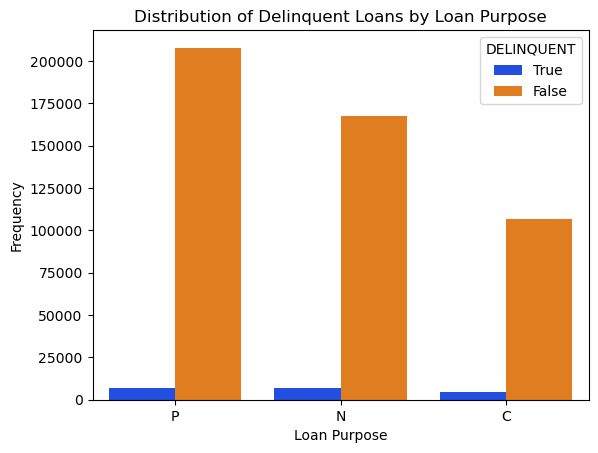

In [699]:
sns.countplot(x='LOAN_PURPOSE', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False],
             order=df['LOAN_PURPOSE'].value_counts().sort_values(ascending=False).index)
plt.title('Distribution of Delinquent Loans by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency');



### NUMBER OF BORROWERS.
- As expected when there are two persons responsible for the mortgage, the proportion of delinquency is lower.

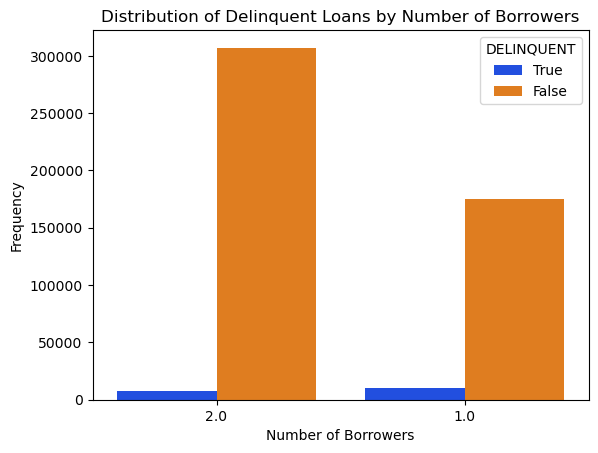

In [54]:
sns.countplot(x='NUMBER_OF_BORROWERS', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False],
             order=df['NUMBER_OF_BORROWERS'].value_counts().sort_values(ascending=False).index)
plt.title('Distribution of Delinquent Loans by Number of Borrowers')
plt.xlabel('Number of Borrowers')
plt.ylabel('Frequency');



### SELLER NAME
- The entity acting in its capacity as a seller of mortgages to Freddie Mac at the time of acquisition.

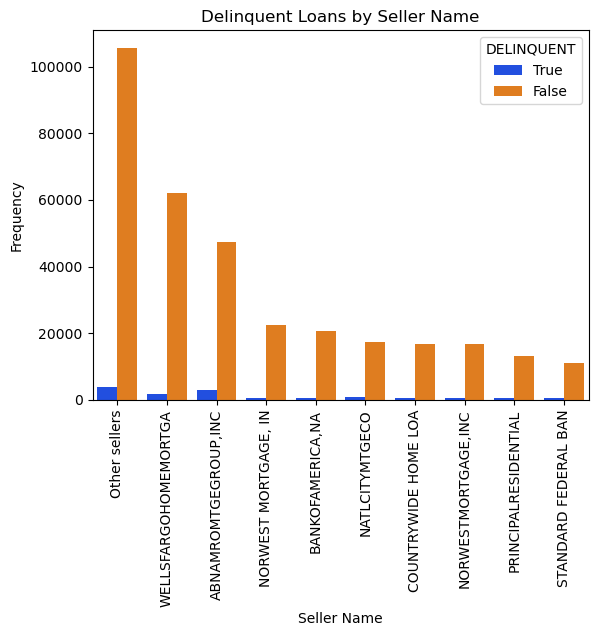

In [55]:
sns.countplot(x='SELLER_NAME', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False],
             order=df['SELLER_NAME'].value_counts().sort_values(ascending=False).index[:10])
plt.title('Delinquent Loans by Seller Name')
plt.xlabel('Seller Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90);
#Top 10 of seller names divided between Delinquent or not
# In this chart we can see that proportionally ABNAMROMTGEGROUP has the most Delinquent customers.
# Wells Fargo seems to have the same proportion to the other banks
# The majority of values do not have a known bank name

- Servicer" is the company responsible for servicing the loan, meaning they manage the borrower's account, process payments, and handle delinquencies and defaults. The "Seller" is the company that originates and sells the loan to Freddie Mac. The seller can also service the loan, but it is not required.

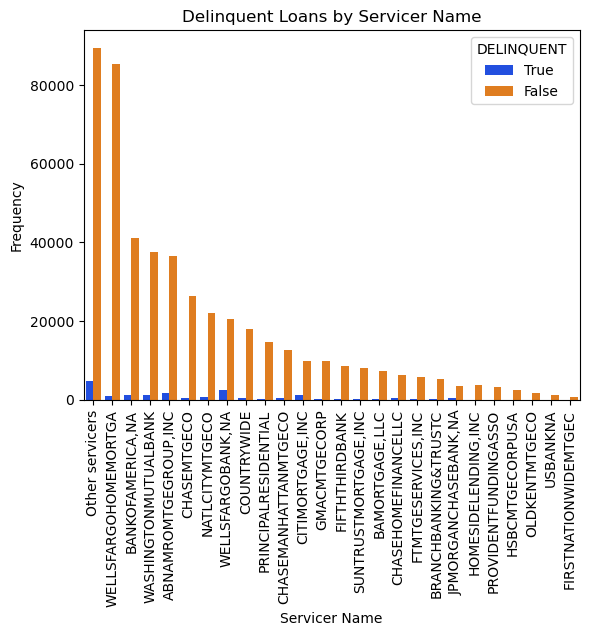

In [56]:
sns.countplot(x='SERVICER_NAME', data=df, hue='DELINQUENT',palette='bright',hue_order=[True,False],
             order=df['SERVICER_NAME'].value_counts().sort_values(ascending=False).index)
plt.title('Delinquent Loans by Servicer Name')
plt.xlabel('Servicer Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90);

# Servicer banks names divided between Delinquent or not
# When we review the servicer there is a difference between Servicer and Seller
# Wells fargo now have 2 appearances in the top 10 and bank of america is now the third one.
# Also we can see also that Wells Fargo NA has a bigger proportion of Delinquency that other banks


# 6.Reviewing null values
[Back to top](#Table-of-Contents)

### Problems with null values
- Due to problems with the preprocessor all null values where replaced by most frequent value. These error could have been solved with a custom transformers.
- First time home buyer flag and Metropolitan Statistical Area have significantly number of nulls and filling it with the most frequent value is probably not the best but to simplify the preproccesing I decided to do that. 

In [57]:
df.isna().sum().sort_values(ascending=False)

FIRST_TIME_HOMEBUYER_FLAG           130559
METROPOLITAN_STATISTICAL_AREA        70149
MORTGAGE_INSURANCE_PERCENTAGE        51048
ORIGINAL_DEBT_TO_INCOME_RATIO        14929
PREPAYMENT_PENALTY_MORTGAGE_FLAG      5178
CREDIT_SCORE                          2711
NUMBER_OF_BORROWERS                    247
PROPERTY_TYPE                           95
POSTAL_CODE                             31
ORIGINAL_COMBINED_LOAN_TO_VALUE         13
ORIGINAL_LOAN_TO_VALUE                   9
NUMBER_OF_UNITS                          3
FIRST_PAYMENT_DATE_m                     0
ORIGINAL_LOAN_TERM                       0
temp                                     0
DELINQUENT                               0
MATURITY_DATE_y                          0
PREPAID                                  0
SERVICER_NAME                            0
SELLER_NAME                              0
FIRST_PAYMENT_DATE_y                     0
PROPERTY_STATE                           0
LOAN_PURPOSE                             0
LOAN_SEQUEN

### FIRST_TIME_HOMEBUYER_FLAG
- Too many NA Values around 26% of the total. A new categorie called None will be used for the null values. (Please se note at the beginning of this section about this particular variable)

In [58]:
df['FIRST_TIME_HOMEBUYER_FLAG'].isna().sum()/len(df)

0.261046473266325

### MORTGAGE INSURANCE PERCENTAGE 
- Still a significant part of nulls around 10%, From the EDA that I will repeat here we can see than filling them with most frequent which is 0.

In [59]:
df['MORTGAGE_INSURANCE_PERCENTAGE'].isna().sum()/len(df)

0.10206803335885967

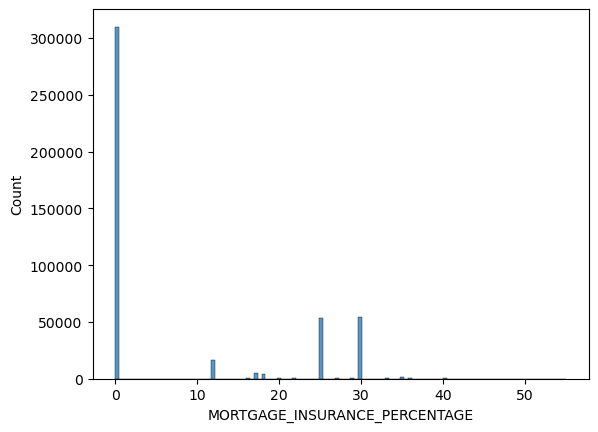

In [61]:
sns.histplot(x='MORTGAGE_INSURANCE_PERCENTAGE', data=df,palette='bright');

### ORIGINAL_DEBT_TO_INCOME_RATIO    
- Just 2.9% of values are null, since this is a continuos variable most_frequent is an acceptable way to fill nulls.

In [42]:
df['ORIGINAL_DEBT_TO_INCOME_RATIO'].isna().sum()/len(df)

0.02984982114900517

### REST OF NULL VALUES FOR ALL OTHER VARIABLES
- All other feature have less than 1% of null values so I will use the most frequent for all of them 

# 7.Preprocessor
[Back to top](#Table-of-Contents)

In [65]:
# Checking all columns. 
df.columns

Index(['CREDIT_SCORE', 'FIRST_PAYMENT_DATE', 'FIRST_TIME_HOMEBUYER_FLAG',
       'MATURITY_DATE', 'METROPOLITAN_STATISTICAL_AREA',
       'MORTGAGE_INSURANCE_PERCENTAGE', 'NUMBER_OF_UNITS', 'OCCUPANCY_STATUS',
       'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'ORIGINAL_DEBT_TO_INCOME_RATIO',
       'ORIGINAL_UPB', 'ORIGINAL_LOAN_TO_VALUE', 'ORIGINAL_INTEREST_RATE',
       'CHANNEL', 'PREPAYMENT_PENALTY_MORTGAGE_FLAG', 'PRODUCT_TYPE',
       'PROPERTY_STATE', 'PROPERTY_TYPE', 'POSTAL_CODE',
       'LOAN_SEQUENCE_NUMBER', 'LOAN_PURPOSE', 'ORIGINAL_LOAN_TERM',
       'NUMBER_OF_BORROWERS', 'SELLER_NAME', 'SERVICER_NAME', 'PREPAID',
       'DELINQUENT', 'temp', 'FIRST_PAYMENT_DATE_y', 'FIRST_PAYMENT_DATE_m',
       'MATURITY_DATE_y', 'MATURITY_DATE_m'],
      dtype='object')

In [43]:
# Important to drop Prepaid as it creates dataleakage.
# Dropping the label Delinquency

categorical_cols=['FIRST_TIME_HOMEBUYER_FLAG','METROPOLITAN_STATISTICAL_AREA','NUMBER_OF_UNITS',
                 'OCCUPANCY_STATUS','CHANNEL','PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                  'PROPERTY_STATE','PROPERTY_TYPE','POSTAL_CODE','LOAN_PURPOSE','NUMBER_OF_BORROWERS',
                  'SELLER_NAME','SERVICER_NAME', 'FIRST_PAYMENT_DATE_y','FIRST_PAYMENT_DATE_m']

- One hot col encoder for categories with few options

In [378]:
one_hot_cols=['FIRST_TIME_HOMEBUYER_FLAG','NUMBER_OF_UNITS','OCCUPANCY_STATUS','CHANNEL',
              'PREPAYMENT_PENALTY_MORTGAGE_FLAG','PRODUCT_TYPE',
                  'PROPERTY_TYPE','LOAN_PURPOSE','NUMBER_OF_BORROWERS']

- Target encodeR for categories with plenty of options to avoid high dimensionality.

In [379]:
target_encode_cols=['METROPOLITAN_STATISTICAL_AREA','PROPERTY_STATE','POSTAL_CODE','SELLER_NAME','SERVICER_NAME',
                'FIRST_PAYMENT_DATE_y','FIRST_PAYMENT_DATE_m']

- Numerical Columns

In [380]:
numerical_cols=['CREDIT_SCORE','MORTGAGE_INSURANCE_PERCENTAGE','ORIGINAL_COMBINED_LOAN_TO_VALUE','ORIGINAL_DEBT_TO_INCOME_RATIO',
              'ORIGINAL_UPB','ORIGINAL_LOAN_TO_VALUE','ORIGINAL_INTEREST_RATE','ORIGINAL_LOAN_TERM']

In [471]:
### Calling the Encoders and Imputers
target_encoder = TargetEncoder()
one_hot_encoder = OneHotEncoder()
imputer_s=SimpleImputer(strategy='most_frequent')

- Setting X and y variables and train_test_split

In [845]:
X=df[one_hot_cols+target_encode_cols+numerical_cols]
y=df['DELINQUENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [846]:
### Imputing Outside the preprocessor because of column transformer issues.
X_train_imputed=pd.DataFrame(imputer_s.fit_transform(X_train),columns=X_train.columns, index=X_train.index) #fit transform on train
X_test_imputed=pd.DataFrame(imputer_s.transform(X_test),columns=X_test.columns, index=X_test.index) 

- Running Preprocessor. This preprocessor will be used in all models

In [473]:
preprocessor = ColumnTransformer(transformers=[
    ('one_hot_encoder', one_hot_encoder, one_hot_cols), 
    ('target_encoder', target_encoder, target_encode_cols),
    ('robust_scaler',RobustScaler(),numerical_cols) #Robust Scaler for linear models
])

# 8.Score Metric
[Back to top](#Table-of-Contents)

- Recall is an important metric for identifying delinquent loans because it measures the ability of the model to correctly identify all positive cases (i.e., the cases where the loan is actually delinquent). In other words, recall measures the model's ability to avoid false negatives, or cases where the model incorrectly predicts that a loan is not delinquent when it actually is.

- For identifying delinquent loans, it is generally more important to have a high recall than a high precision (which measures the ability of the model to correctly identify true positive cases out of all the positive predictions made). This is because false negatives (loans that are actually delinquent but are not identified as such by the model) can have serious consequences for both the lender and the borrower, while false positives (loans that are incorrectly identified as delinquent) are usually less costly and can be addressed through further investigation.

- Therefore, a model with high recall would be able to identify most of the delinquent loans, minimizing the risk of losses for the lender and ensuring that the borrower receives the necessary support to avoid default.

- I will use Recall as the main metric for all models.

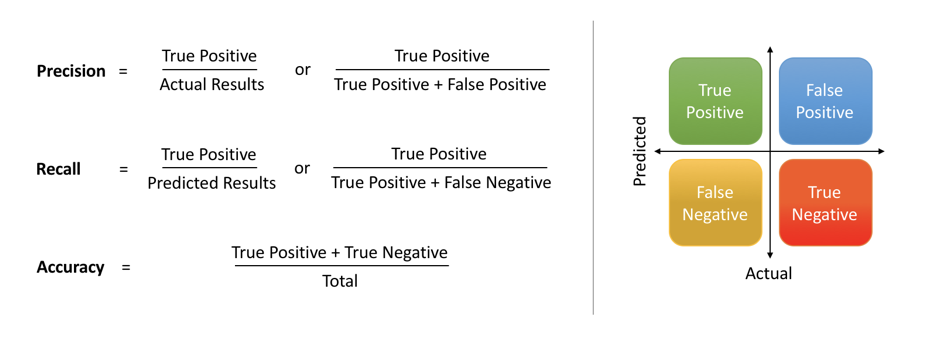

# 9.Baseline Model - Logistic Regression
[Back to top](#Table-of-Contents)

In [383]:
LR_pipeline = Pipeline([
    ('preprocessor', preprocessor), #calling preprocessor
    ('oversampler', SMOTE()), #Using SMOTE as oversampler
    ('model', LogisticRegression(max_iter=1000)) # Base Model no Hyper Tuning
])


In [738]:
%%time
LR_pipeline.fit(X_train_imputed,y_train)

Wall time: 54.3 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'NUMBER_OF_UNITS',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL',
                                                   'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                                                   'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS']),
                                                 ('target_encoder',
                                                  TargetEncoder(),
                                                

In [739]:
y_pred = LR_pipeline.predict(X_test_imputed)

In [740]:
print(classification_report(y_test,y_pred))  # Good Recall metric it is worth it to Hyper Tune

              precision    recall  f1-score   support

       False       0.99      0.78      0.87     96426
        True       0.11      0.77      0.20      3602

    accuracy                           0.78    100028
   macro avg       0.55      0.77      0.53    100028
weighted avg       0.96      0.78      0.85    100028



### Hypertuning Logistic Regression with Randomized Search CV

In [802]:
%%time
scorer = make_scorer(recall_score, pos_label=True)
parameters = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.1,0.1,0.9],
    'model__solver': ['liblinear'],
    'model__max_iter': [1000]
}
scorer = make_scorer(recall_score, pos_label=True)
LR_gs = GridSearchCV(LR_pipeline, parameters, cv=4, n_jobs=-1, verbose=1, scoring=scorer)

Wall time: 0 ns


In [803]:
%%time
LR_gs.fit(X_train_imputed,y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
Wall time: 18min 6s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(),
                                                                         ['FIRST_TIME_HOMEBUYER_FLAG',
                                                                          'NUMBER_OF_UNITS',
                                                                          'OCCUPANCY_STATUS',
                                                                          'CHANNEL',
                                                                          'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                                                                          'PRODUCT_TYPE',
                                                                          'PROPERTY_TYPE',
                                                                          'LO

In [804]:
print("Best score: ", LR_gs.best_score_)
print("Best parameters: ", LR_gs.best_params_)
#getting score and parameters

Best score:  0.7621792556733478
Best parameters:  {'model__C': 0.1, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [805]:
%%time
### Jupiter notebook crashed It was easier to do a pipeline with the best parameters than running the grid again
Best_LR_pipeline = Pipeline([
    ('preprocessor', preprocessor), #calling preprocessor
    ('oversampler', SMOTE()), #Using SMOTE as oversampler
    ('model', LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2', C=0.1)) # Best Model After Hypertuning
])

Best_LR_pipeline.fit(X_train_imputed,y_train)

Wall time: 13.7 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'NUMBER_OF_UNITS',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL',
                                                   'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                                                   'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS']),
                                                 ('target_encoder',
                                                  TargetEncoder(),
                                                

In [806]:
final_scores= cross_val_score(Best_LR_pipeline,X_train_imputed,y_train, cv=5, scoring=scorer,n_jobs=-1)

In [807]:
final_scores

array([0.76615705, 0.76198749, 0.77067408, 0.75642808, 0.75356274])

In [808]:
final_scores.mean(),final_scores.std()
# Stable model not overfitting with a low standard deviation

(0.7617618876121588, 0.0062365236238782545)

In [809]:
y_pred= Best_LR_pipeline.predict(X_test_imputed)

In [810]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.99      0.77      0.87     96426
        True       0.11      0.77      0.20      3602

    accuracy                           0.77    100028
   macro avg       0.55      0.77      0.53    100028
weighted avg       0.96      0.77      0.84    100028



### ROC AUC (Receiver Operating Characteristic Area Under Curve)

In [818]:
probas = Best_LR_pipeline.predict_proba(X_test_imputed)[:,1]

In [819]:
fpr, tpr, thresholds = roc_curve(y_test, probas)

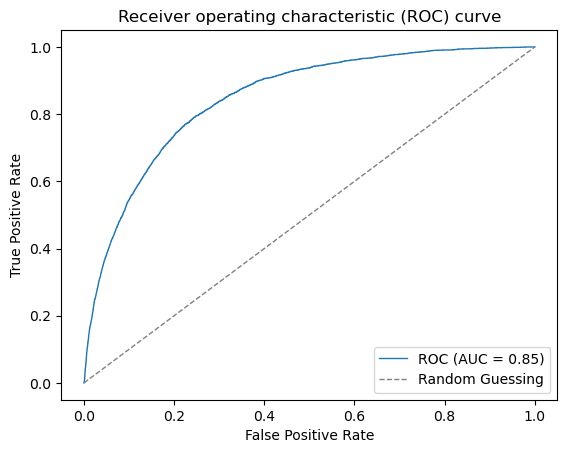

In [820]:
# Plot ROC curve
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random Guessing')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [821]:
roc_auc #Area under the curve is 0.84, 1 is the best possible, better than random guessing= 0.5

0.848530413687006

###  Model Interpretation Logistic Regression

In [822]:
Best_LR_pipeline.named_steps['preprocessor'].named_transformers_
#showing how the order of the columns so I can bring all the names

{'one_hot_encoder': OneHotEncoder(),
 'target_encoder': TargetEncoder(cols=['METROPOLITAN_STATISTICAL_AREA', 'PROPERTY_STATE',
                     'POSTAL_CODE', 'SELLER_NAME', 'SERVICER_NAME',
                     'FIRST_PAYMENT_DATE_y', 'FIRST_PAYMENT_DATE_m']),
 'robust_scaler': RobustScaler()}

In [823]:
### All the names of the hot_encoders
LR_one_hot_encoder_names= Best_LR_pipeline.named_steps['preprocessor'].named_transformers_['one_hot_encoder'].get_feature_names_out().tolist()
LR_one_hot_encoder_names

['FIRST_TIME_HOMEBUYER_FLAG_N',
 'FIRST_TIME_HOMEBUYER_FLAG_Y',
 'NUMBER_OF_UNITS_1.0',
 'NUMBER_OF_UNITS_2.0',
 'NUMBER_OF_UNITS_3.0',
 'NUMBER_OF_UNITS_4.0',
 'OCCUPANCY_STATUS_I',
 'OCCUPANCY_STATUS_O',
 'OCCUPANCY_STATUS_S',
 'CHANNEL_B',
 'CHANNEL_C',
 'CHANNEL_R',
 'CHANNEL_T',
 'PREPAYMENT_PENALTY_MORTGAGE_FLAG_N',
 'PREPAYMENT_PENALTY_MORTGAGE_FLAG_Y',
 'PRODUCT_TYPE_FRM',
 'PROPERTY_TYPE_CO',
 'PROPERTY_TYPE_CP',
 'PROPERTY_TYPE_LH',
 'PROPERTY_TYPE_MH',
 'PROPERTY_TYPE_PU',
 'PROPERTY_TYPE_SF',
 'LOAN_PURPOSE_C',
 'LOAN_PURPOSE_N',
 'LOAN_PURPOSE_P',
 'NUMBER_OF_BORROWERS_1.0',
 'NUMBER_OF_BORROWERS_2.0']

In [824]:
### All the names of the target_encoders
LR_target_encoder_names= Best_LR_pipeline.named_steps['preprocessor'].named_transformers_['target_encoder'].get_feature_names_out()
LR_target_encoder_names

['METROPOLITAN_STATISTICAL_AREA',
 'PROPERTY_STATE',
 'POSTAL_CODE',
 'SELLER_NAME',
 'SERVICER_NAME',
 'FIRST_PAYMENT_DATE_y',
 'FIRST_PAYMENT_DATE_m']

In [825]:
## All the names affected by robust scaler
LR_robust_scaler_names=Best_LR_pipeline.named_steps['preprocessor'].named_transformers_['robust_scaler'].get_feature_names_out().tolist()
LR_robust_scaler_names

['CREDIT_SCORE',
 'MORTGAGE_INSURANCE_PERCENTAGE',
 'ORIGINAL_COMBINED_LOAN_TO_VALUE',
 'ORIGINAL_DEBT_TO_INCOME_RATIO',
 'ORIGINAL_UPB',
 'ORIGINAL_LOAN_TO_VALUE',
 'ORIGINAL_INTEREST_RATE',
 'ORIGINAL_LOAN_TERM']

In [401]:
LR_feature_names=LR_one_hot_encoder_names+LR_target_encoder_names+LR_robust_scaler_names
# bringing all names together

In [826]:
LR_coef= Best_LR_pipeline.named_steps['model'].coef_[0] # getting all the coefficients

In [827]:
LR_df_coef = pd.DataFrame(LR_coef, index=LR_feature_names, columns=['Coefficient'])
# converting names and coefficients into a dataframe

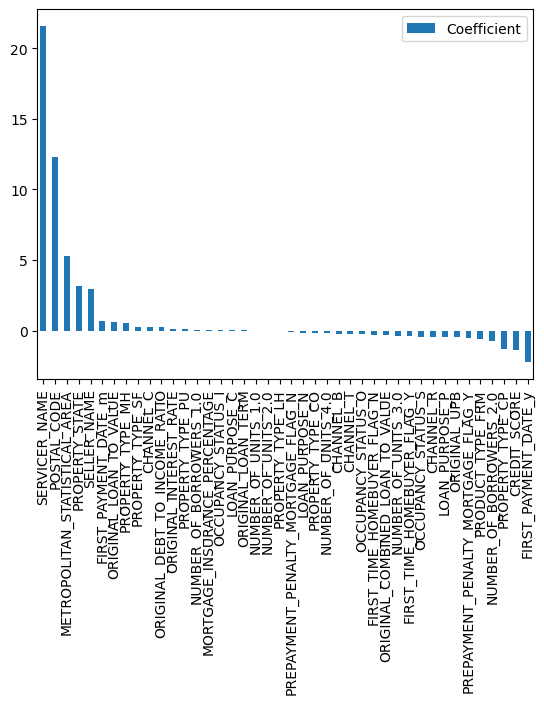

In [828]:
LR_df_coef.sort_values('Coefficient',ascending=False).plot(kind='bar');
## The l1 penalty brought plenty of variables to almost 0

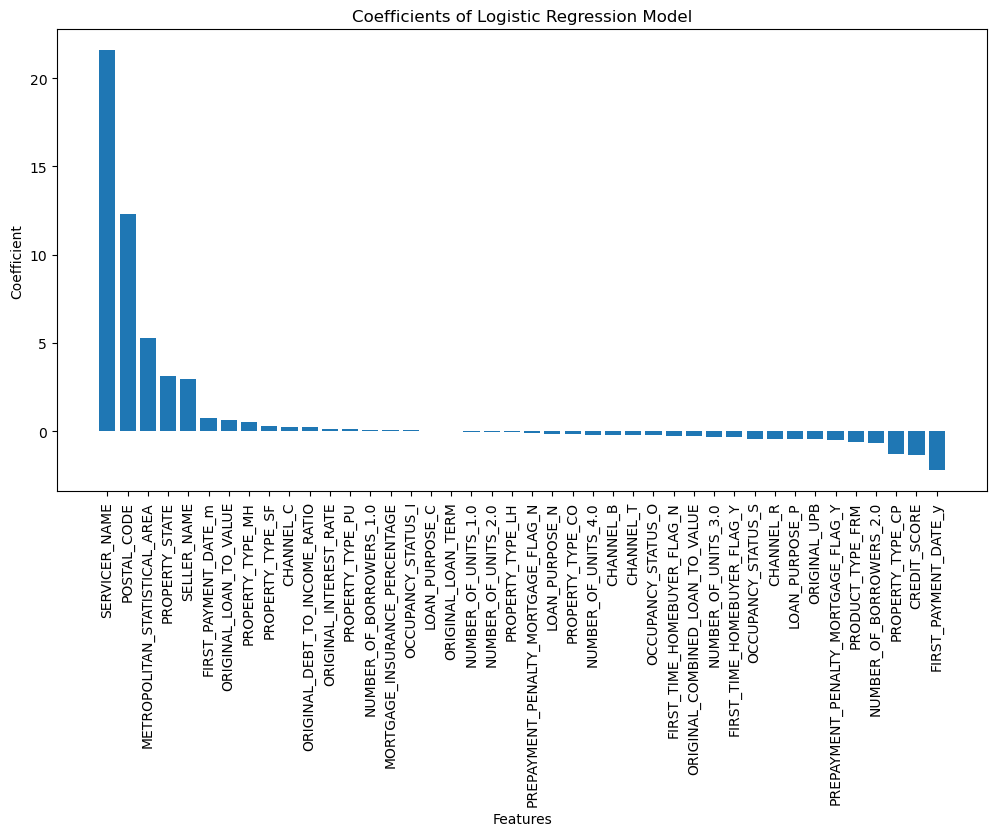

In [852]:
sorted_coef_df = LR_df_coef.sort_values('Coefficient',ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(x=sorted_coef_df.index, height=sorted_coef_df['Coefficient'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

# 10.Ensemble Models & Stacking
[Back to top](#Table-of-Contents)

### XGB model

In [474]:
XGB_pipeline = Pipeline([
    ('preprocessor', preprocessor), #calling same preprocessor
    ('oversampler', SMOTE()), #Using SMOTE as oversampler
    ('model', XGBClassifier()) 
])


In [475]:
%%time
XGB_pipeline.fit(X_train_imputed,y_train)

Wall time: 30.5 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'NUMBER_OF_UNITS',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL',
                                                   'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                                                   'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS']),
                                                 ('target_encoder',
                                                  TargetEncoder(),
                                                

In [476]:
y_pred = XGB_pipeline.predict(X_test_imputed)

In [477]:
print(classification_report(y_test,y_pred)) # Recall is really bad

              precision    recall  f1-score   support

       False       0.97      1.00      0.98     96426
        True       0.45      0.08      0.14      3602

    accuracy                           0.96    100028
   macro avg       0.71      0.54      0.56    100028
weighted avg       0.95      0.96      0.95    100028



In [418]:
scorer = make_scorer(recall_score, pos_label=True) #custom scorer for CV looking at recall

In [419]:
final_scores= cross_val_score(XGB_pipeline,X_train_imputed,y_train, cv=5, scoring=scorer,n_jobs=-1)

In [420]:
final_scores # All scores are bad in comparison with logistic Regression

array([0.07505212, 0.07296734, 0.08061154, 0.07018763, 0.0795968 ])

In [421]:
final_scores.mean(), final_scores.std() # The std is almost none which means model is not overfitting

(0.07568308525380296, 0.003939041226653264)

### Hypertuning XG Boost

In [596]:
scorer = make_scorer(recall_score, pos_label=True)
parameters = {
    'model__max_depth': [3,6,10], #similar to decision trees but in this case is not recommendable more than 10 and 6 is default
    'model__eta': [.05,.1,.3], #learning rate, a slower learning rate tends to be better against overfitting
    'model__objective':['binary:logistic'] # best model for binary labels
}


XG_gs = GridSearchCV(XGB_pipeline, parameters, cv=5, n_jobs=-1, verbose=2, scoring=scorer)

In [597]:
%%time
XG_gs.fit(X_train_imputed,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Wall time: 30min 5s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(),
                                                                         ['FIRST_TIME_HOMEBUYER_FLAG',
                                                                          'NUMBER_OF_UNITS',
                                                                          'OCCUPANCY_STATUS',
                                                                          'CHANNEL',
                                                                          'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                                                                          'PRODUCT_TYPE',
                                                                          'PROPERTY_TYPE',
                                                                          'LO

In [598]:
print("Best score: ", XG_gs.best_score_)
print("Best parameters: ", XG_gs.best_params_)
#Great increase in Recall but still not a good model.

Best score:  0.4163585630251959
Best parameters:  {'model__eta': 0.05, 'model__max_depth': 3, 'model__objective': 'binary:logistic'}


In [599]:
XG_best_model= XG_gs.best_estimator_

In [847]:
y_pred = XG_best_model.predict(X_test_imputed)

In [848]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.98      0.92      0.95     96426
        True       0.17      0.43      0.24      3602

    accuracy                           0.90    100028
   macro avg       0.57      0.67      0.59    100028
weighted avg       0.95      0.90      0.92    100028



In [600]:
XG_final_scores= cross_val_score(XG_best_model,X_train_imputed,y_train, cv=5, scoring=scorer,n_jobs=-1)

In [601]:
XG_final_scores

array([0.42494788, 0.42946491, 0.41765115, 0.41556637, 0.39659367])

In [602]:
XG_final_scores.mean(),final_scores.std() #Stable scores not overfitting

(0.41684479455691215, 0.003939041226653264)

#### No Interpretation of XGboost
- The model is too far from Logistic Regression in recall, so it does not make sense to get features importance as it is not a good model

### Random Forest

In [752]:
RFC_pipeline = Pipeline([
    ('preprocessor', preprocessor), #calling preprocessor
    ('oversampler', SMOTE()), #Using SMOTE as oversampler
    ('model', RandomForestClassifier()) 
])

In [753]:
%%time
RFC_pipeline.fit(X_train_imputed,y_train)

Wall time: 2min 34s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'NUMBER_OF_UNITS',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL',
                                                   'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                                                   'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS']),
                                                 ('target_encoder',
                                                  TargetEncoder(),
                                                

In [427]:
y_pred=RFC_pipeline.predict(X_test_imputed)

In [428]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     96426
        True       0.38      0.10      0.16      3602

    accuracy                           0.96    100028
   macro avg       0.67      0.55      0.57    100028
weighted avg       0.95      0.96      0.95    100028



#### No Interpretation or Hypertuning of Random Forest
- The model is too far from Logistic Regression in recall, so it does not make sense to hypertune or get features importance as it is not a good model

---

### Voting Classifier

- Trying voting classifier since XGboost, Random Forest are better in precision and the Logistic regression is better at recall perhaps a soft vote will give a better model overall.

In [429]:
vclf = VotingClassifier(estimators=[
    ('LR', LogisticRegression(max_iter=1000,solver='liblinear', penalty='l1',C=0.68)),
    ('XGB', XGBClassifier(eta= 0.05,max_depth= 3, objective= 'binary:logistic')),
    ('RF', RandomForestClassifier())
    ], voting='soft')

VCLF_pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('oversampler', SMOTE()),
    ('model', vclf)
])


In [431]:
%%time
VCLF_pipeline.fit(X_train_imputed, y_train)

Wall time: 3min 26s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'NUMBER_OF_UNITS',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL',
                                                   'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                                                   'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS']),
                                                 ('target_encoder',
                                                  TargetEncoder(),
                                                

In [432]:
y_pred = VCLF_pipeline.predict(X_test_imputed)

In [433]:
print(classification_report(y_test,y_pred)) # better than the standalone XGbooster and Random Tree but not close to LR in recall

              precision    recall  f1-score   support

       False       0.98      0.93      0.96     96426
        True       0.20      0.45      0.28      3602

    accuracy                           0.92    100028
   macro avg       0.59      0.69      0.62    100028
weighted avg       0.95      0.92      0.93    100028



### STACKING

In [714]:
clf = StackingClassifier(estimators=[
    ('XGB', XGBClassifier(eta= 0.05,max_depth= 3, objective= 'binary:logistic')), # Best XG boost
    ('RF', RandomForestClassifier()), # Trying again with Random Forest
    ('LR', LogisticRegression(max_iter=1000,solver='lbfgs',C=0.01)), # LR since is the best until now
    ('LR2', LogisticRegression(max_iter=1000)) # LR a base model logistic regresion
    ],
    final_estimator=LogisticRegression(max_iter=1000,solver='liblinear', penalty='l1',C=0.68))
    # perhaps using a logistic regression as a final estimator will help the model

clf_pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('oversampler', SMOTE()),
    ('model', clf)
])


In [715]:
%%time
clf_pipe.fit(X_train_imputed, y_train)

Wall time: 13min 16s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'NUMBER_OF_UNITS',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL',
                                                   'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                                                   'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS']),
                                                 ('target_encoder',
                                                  TargetEncoder(),
                                                

In [716]:
y_pred = clf_pipe.predict(X_test_imputed)

In [717]:
print(classification_report(y_test,y_pred)) # It did not work recall still terrible.
# A single Logistic regression is much better at recall.

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     96426
        True       0.33      0.11      0.16      3602

    accuracy                           0.96    100028
   macro avg       0.65      0.55      0.57    100028
weighted avg       0.94      0.96      0.95    100028



# 11.LIME - Local Explanations
[Back to top](#Table-of-Contents)

In [755]:
### Converting X_train_imputed to X_Train_preprocessed to have all the features in order to get Lime model interpretation.
X_train_temp=preprocessor.fit_transform(X_train_imputed,y_train) # temporal variable for better readability
X_train_preprocessed= pd.DataFrame(X_train_temp, columns= LR_feature_names, index=X_train_imputed.index) # converting to df
X_train_preprocessed.head(3)

FIRST_TIME_HOMEBUYER_FLAG_N  FIRST_TIME_HOMEBUYER_FLAG_Y  \
447004                          1.0                          0.0   
97872                           1.0                          0.0   
245294                          1.0                          0.0   

        NUMBER_OF_UNITS_1.0  NUMBER_OF_UNITS_2.0  NUMBER_OF_UNITS_3.0  \
447004                  1.0                  0.0                  0.0   
97872                   1.0                  0.0                  0.0   
245294                  1.0                  0.0                  0.0   

        NUMBER_OF_UNITS_4.0  OCCUPANCY_STATUS_I  OCCUPANCY_STATUS_O  \
447004                  0.0                 0.0                 1.0   
97872                   0.0                 0.0                 1.0   
245294                  0.0                 0.0                 1.0   

        OCCUPANCY_STATUS_S  CHANNEL_B  ...  FIRST_PAYMENT_DATE_y  \
447004                 0.0        0.0  ...              0.040979   
97872                  0.0        0.0  ...              0.034472   
245294                 0.0        0.0  ...              0.035960   

        FIRST_PAYMENT_DATE_m  CREDIT_SCORE  MORTGAGE_INSURANCE_PERCENTAGE  \
447004              0.036727       -0.7500                       0.000000   
97872               0.038364       -1.2500                       2.083333   
245294              0.036639       -0.6375                       0.000000   

        ORIGINAL_COMBINED_LOAN_TO_VALUE  ORIGINAL_DEBT_TO_INCOME_RATIO  \
447004                         0.000000                       0.266667   
97872                          0.555556                       1.600000   
245294                        -0.111111                      -0.266667   

        ORIGINAL_UPB  ORIGINAL_LOAN_TO_VALUE  ORIGINAL_INTEREST_RATE  \
447004      1.081395                0.000000                     0.5   
97872      -0.686047                0.666667                     0.5   
245294     -0.872093               -0.133333                     3.5   

        ORIGINAL_LOAN_TERM  
447004                 0.0  
97872                  0.0  
245294                 0.0  

[3 rows x 42 columns]

In [758]:
### Same logic for X_test
X_test_temp= preprocessor.transform(X_test_imputed)
X_test_preprocessed= pd.DataFrame(X_test_temp,columns= LR_feature_names, index=X_test_imputed.index)
X_test_preprocessed.head(3)

FIRST_TIME_HOMEBUYER_FLAG_N  FIRST_TIME_HOMEBUYER_FLAG_Y  \
254484                          1.0                          0.0   
305424                          1.0                          0.0   
124448                          1.0                          0.0   

        NUMBER_OF_UNITS_1.0  NUMBER_OF_UNITS_2.0  NUMBER_OF_UNITS_3.0  \
254484                  1.0                  0.0                  0.0   
305424                  1.0                  0.0                  0.0   
124448                  1.0                  0.0                  0.0   

        NUMBER_OF_UNITS_4.0  OCCUPANCY_STATUS_I  OCCUPANCY_STATUS_O  \
254484                  0.0                 0.0                 1.0   
305424                  0.0                 0.0                 1.0   
124448                  0.0                 0.0                 1.0   

        OCCUPANCY_STATUS_S  CHANNEL_B  ...  FIRST_PAYMENT_DATE_y  \
254484                 0.0        0.0  ...              0.035960   
305424                 0.0        0.0  ...              0.035858   
124448                 0.0        0.0  ...              0.034472   

        FIRST_PAYMENT_DATE_m  CREDIT_SCORE  MORTGAGE_INSURANCE_PERCENTAGE  \
254484              0.035177        1.1625                            0.0   
305424              0.035177        0.9625                            0.0   
124448              0.036639       -0.3625                            0.0   

        ORIGINAL_COMBINED_LOAN_TO_VALUE  ORIGINAL_DEBT_TO_INCOME_RATIO  \
254484                        -1.611111                      -1.000000   
305424                        -0.555556                      -1.066667   
124448                        -1.611111                      -0.066667   

        ORIGINAL_UPB  ORIGINAL_LOAN_TO_VALUE  ORIGINAL_INTEREST_RATE  \
254484     -1.011628               -1.933333                    2.50   
305424      1.151163               -0.666667                    0.25   
124448     -0.686047               -1.933333                   -0.75   

        ORIGINAL_LOAN_TERM  
254484                 0.0  
305424                 0.0  
124448                 0.0  

[3 rows x 42 columns]

In [484]:
# Initialize SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform X_train and y_train using SMOTE
X_train_resample, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)




In [856]:
LR_best_model= LogisticRegression(max_iter=1000,solver='liblinear', penalty='l1',C=0.68)

In [857]:
LR_best_model.fit(X_train_resample,y_train_resampled) #fitting the best model with preprocessed and resample data

LogisticRegression(C=0.68, max_iter=1000, penalty='l1', solver='liblinear')

In [858]:
y_pred= LR_best_model.predict(X_test_preprocessed) # Getting the predicted label

In [494]:
# Creating a dataframe with test and predicted to review particular cases
test_predict=pd.DataFrame({'Predicted_label': pd.Series(y_pred,index=y_test.index), 'Truth_label': y_test})

In [496]:
#comparing the ones that the model got wrong
test_predict[test_predict['Predicted_label']!=test_predict['Truth_label']]


Predicted_label  Truth_label
158431             True        False
374145             True        False
88346             False         True
81994              True        False
349857             True        False
...                 ...          ...
496594             True        False
253748             True        False
192850             True        False
313756             True        False
482697             True        False

[22476 rows x 2 columns]

In [859]:
## Calling LimeTabularExplainer
explainer=LimeTabularExplainer(X_train_resample.values, feature_names= X_train_resample.columns.values, class_names=['Non-Delinquent','Delinquent'])

#### Customer 158431 was predicted as delinquent when it was not.
- We can see that the Servicer Name, Property Type Cooperative, the credit core and the Occupancy Status as secondary are the main features moving this client to Delinquent according to the model.
- Not being par of Channel correspondent or broker, having 2 borrowers on the loan and that the loan purpose is to purchase a home all help the customer to bein a non-delinquent but not enough just 20%

In [761]:
X.loc[158431]

FIRST_TIME_HOMEBUYER_FLAG                              N
NUMBER_OF_UNITS                                      1.0
OCCUPANCY_STATUS                                       O
CHANNEL                                                T
PREPAYMENT_PENALTY_MORTGAGE_FLAG                       N
PRODUCT_TYPE                                         FRM
PROPERTY_TYPE                                         SF
LOAN_PURPOSE                                           P
NUMBER_OF_BORROWERS                                  2.0
METROPOLITAN_STATISTICAL_AREA                    39740.0
PROPERTY_STATE                                        PA
POSTAL_CODE                                      19500.0
SELLER_NAME                         PRINCIPAL RESIDENTIA
SERVICER_NAME                           CITIMORTGAGE,INC
FIRST_PAYMENT_DATE_y                                1999
FIRST_PAYMENT_DATE_m                                   4
CREDIT_SCORE                                       684.0
MORTGAGE_INSURANCE_PERCENTAGE  

In [860]:
Customer_index= 158431

# Get the explanation of the 'black_box' model
exp= explainer.explain_instance(X_test_preprocessed.loc[Customer_index],LR_best_model.predict_proba)
exp.show_in_notebook()

C:\Users\Richard\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
### It seems that when the notebook is closed, The notebook does not save LIME results, I saved as an image just in case.

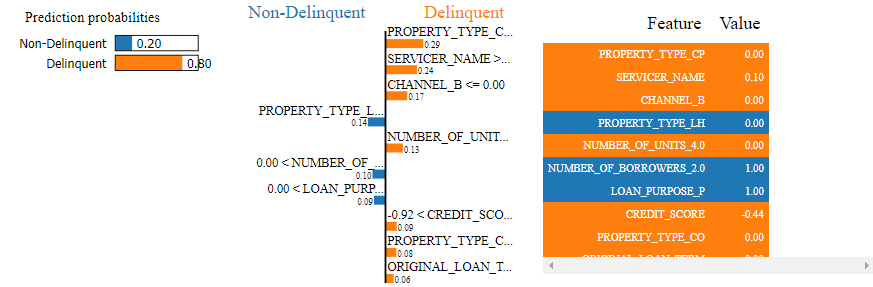

### Customer 374145 was predicted as delinquent when it was not.
- Similar to 158431 thsi customer has too many features pointing to delinquent and that it waas ultimately creates the issue.

In [861]:
Customer_index= 374145


# Get the explanation of the 'black_box' model
exp= explainer.explain_instance(X_test_preprocessed.loc[Customer_index],LR_best_model.predict_proba)
exp.show_in_notebook()

C:\Users\Richard\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
### It seems that when the notebook is closed, The notebook does not save LIME results, I saved as an image just in case.

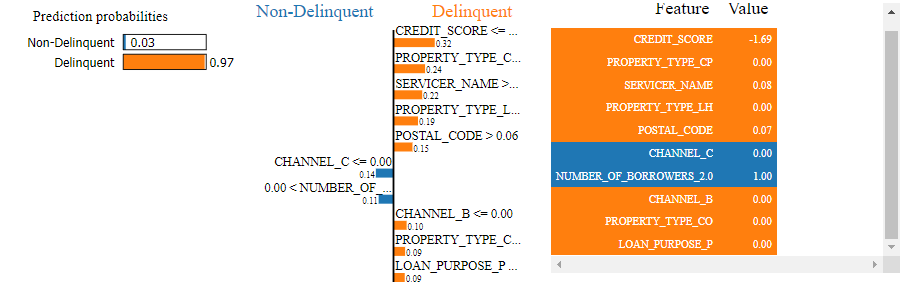

### Customer 88346 was predicted as non-delinquent when it was delinquent.
- This false-negative is probably more important than the 2 previous false-positives as this customer will default when the model says that it wouldn't.
- With a credit score of 724 which is very good is really hard to predict that this customer would default.
- Also it seems that the postal code is also full of non_delinquents so again the model struggles to identify it as Non Delinquent.

In [763]:
X.iloc[88346]

FIRST_TIME_HOMEBUYER_FLAG                              Y
NUMBER_OF_UNITS                                      1.0
OCCUPANCY_STATUS                                       O
CHANNEL                                                R
PREPAYMENT_PENALTY_MORTGAGE_FLAG                       N
PRODUCT_TYPE                                         FRM
PROPERTY_TYPE                                         CO
LOAN_PURPOSE                                           P
NUMBER_OF_BORROWERS                                  1.0
METROPOLITAN_STATISTICAL_AREA                    35644.0
PROPERTY_STATE                                        NJ
POSTAL_CODE                                       7600.0
SELLER_NAME                         GMAC MORTGAGE CORPOR
SERVICER_NAME                            Other servicers
FIRST_PAYMENT_DATE_y                                1999
FIRST_PAYMENT_DATE_m                                   3
CREDIT_SCORE                                       724.0
MORTGAGE_INSURANCE_PERCENTAGE  

In [862]:
Customer_index= 88346

exp= explainer.explain_instance(X_test_preprocessed.loc[Customer_index],LR_best_model.predict_proba)
exp.show_in_notebook()

C:\Users\Richard\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
### It seems that when the notebook is closed, The notebook does not save LIME results, I saved as an image just in case.

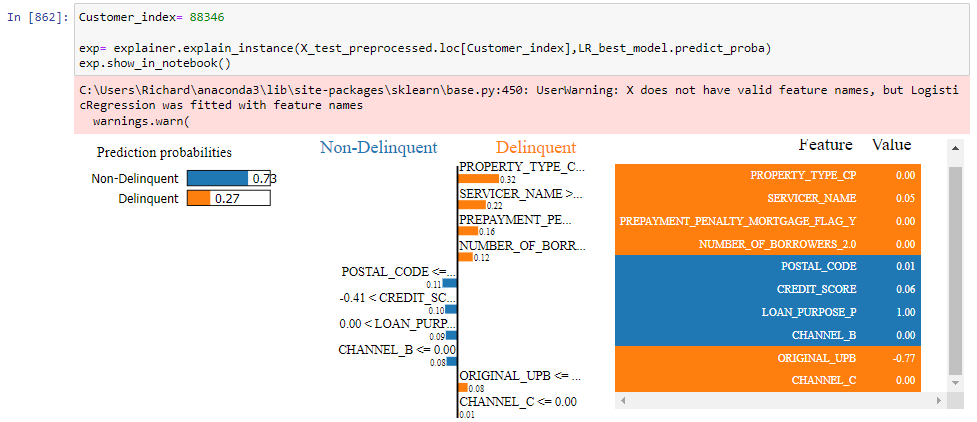

# 12.Deep Learning
[Back to top](#Table-of-Contents)

## MLP Classifier

- I decided to use Adam because it combines the advantages of two other optimization algorithms, Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp),

In [507]:
mlp = MLPClassifier(hidden_layer_sizes=(3, 2), activation='relu', solver='adam', random_state=42)
## 2 layers one with 3 neurons and another with 2. using adam as solver

In [504]:
MLP_pipeline = Pipeline([
    ('preprocessor', preprocessor), #calling preprocessor
    ('oversampler', SMOTE()), #Using SMOTE as oversampler
    ('model', mlp) 
])

In [508]:
%%time
MLP_pipeline.fit(X_train_imputed, y_train)

Wall time: 4min 31s


C:\Users\Richard\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'NUMBER_OF_UNITS',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL',
                                                   'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                                                   'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS']),
                                                 ('target_encoder',
                                                  TargetEncoder(),
                                                

In [509]:
y_pred=MLP_pipeline.predict(X_test_imputed)

In [510]:
print(classification_report(y_test,y_pred))
## Great recall score closer to Logistic Regression.

              precision    recall  f1-score   support

       False       0.99      0.81      0.89     96426
        True       0.12      0.69      0.20      3602

    accuracy                           0.80    100028
   macro avg       0.55      0.75      0.54    100028
weighted avg       0.95      0.80      0.86    100028



### MLP with 6 neurons instead of 3

In [512]:
mlp_6 = MLPClassifier(hidden_layer_sizes=(6, 2), activation='relu', solver='adam', random_state=42)

In [514]:
MLP_6_pipeline = Pipeline([
    ('preprocessor', preprocessor), #calling preprocessor
    ('oversampler', SMOTE()), #Using SMOTE as oversampler
    ('model', mlp_6) 
])

In [515]:
%%time
MLP_6_pipeline.fit(X_train_imputed, y_train)

Wall time: 1min 11s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'NUMBER_OF_UNITS',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL',
                                                   'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                                                   'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS']),
                                                 ('target_encoder',
                                                  TargetEncoder(),
                                                

In [516]:
y_pred=MLP_6_pipeline.predict(X_test_imputed)

In [517]:
print(classification_report(y_test,y_pred))
# it improved recall significantly with 6 neurons

              precision    recall  f1-score   support

       False       0.99      0.75      0.85     96426
        True       0.10      0.78      0.18      3602

    accuracy                           0.75    100028
   macro avg       0.55      0.76      0.52    100028
weighted avg       0.96      0.75      0.83    100028



### MLP with 9 neurons 

In [525]:
mlp_9 = MLPClassifier(hidden_layer_sizes=(9, 4), activation='relu', solver='adam', random_state=42)

In [526]:
MLP_9_pipeline = Pipeline([
    ('preprocessor', preprocessor), #calling preprocessor
    ('oversampler', SMOTE()), #Using SMOTE as oversampler
    ('model', mlp_6) 
])

In [527]:
%%time
MLP_9_pipeline.fit(X_train_imputed, y_train)

Wall time: 1min 16s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'NUMBER_OF_UNITS',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL',
                                                   'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
                                                   'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS']),
                                                 ('target_encoder',
                                                  TargetEncoder(),
                                                

In [528]:
y_pred=MLP_9_pipeline.predict(X_test_imputed)

In [529]:
print(classification_report(y_test,y_pred)) # recall went down again 6 seems better for MLP

              precision    recall  f1-score   support

       False       0.99      0.79      0.88     96426
        True       0.12      0.73      0.20      3602

    accuracy                           0.79    100028
   macro avg       0.55      0.76      0.54    100028
weighted avg       0.96      0.79      0.85    100028



### Final Score with MLP with 6 neurons

In [533]:
scorer = make_scorer(recall_score, pos_label=True)
scores = cross_val_score(MLP_6_pipeline, X_train_imputed, y_train, cv=5, scoring=scorer,n_jobs=-1)

In [534]:
scores

array([0.75747047, 0.74079222, 0.75191105, 0.69041001, 0.6903024 ])

In [535]:
scores.mean(), scores.std()

(0.7261772274078062, 0.029736817865622604)

## Tensor Flow - Keras Model

In [ ]:
## Creating Function to create all the preprocess steps and Oversamples outside a pipeline

In [769]:
def preprocess_oversampler(X_data, y_data, preprocessor, imputer, over_sampled):
    '''This function works only in an iterative manner, 1st the data will be imputed,
    2nd the data will be preprocessed, 3rd data will be balanced using SMOTE()'''
    '''All data will be returned as a pd.DataFrame or pd.Series'''
    # Splitting data in train, test and validate
    X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

    # Imputing data
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_val_imputed = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns, index=X_val.index)
        
    
    X_full_train_imputed= pd.DataFrame(imputer.transform(X_full_train), columns=X_full_train.columns, index=X_full_train.index)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    print("Imputed train data is X_train_imputed:")
    print("\nImputed val data is X_val_imputed:")
    print("\nImputed complete train data is X_full_train:")    
    print("\nImputed final test data is X_test_imputed:")
    
    
    '''After imputing data, it will be preprocessed '''

    X_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_train_imputed, y_train),
                                         columns=LR_feature_names, index=X_train_imputed.index)
    
    X_val_preprocessed=  pd.DataFrame(preprocessor.transform(X_val_imputed),
                                         columns=LR_feature_names, index=X_val_imputed.index)
    
    X_full_train_preprocessed= pd.DataFrame(preprocessor.transform(X_full_train_imputed),
                                         columns=LR_feature_names, index=X_full_train_imputed.index)

    X_test_preprocessed = pd.DataFrame(preprocessor.transform(X_test_imputed),
                                        columns=LR_feature_names, index=X_test_imputed.index)
    
    print("\nPreprocessed train data is X_train_preprocessed:")
    print("\nPreprocessed val data is X_val_preprocessed:")
    print("\nPreprocessed complete train data is X_full_train_preprocessed:")    
    print("\nPreprocessed final test data is X_test_preprocessed:")
    
    
    
    '''After preprocessed data, train data will be oversampled '''
    X_train_resample, y_train_resampled = over_sampled.fit_resample(X_train_preprocessed, y_train)
    
    print("\nOversampled train data is X_train_resample:")
    print("\nOversampled train label is y_train_resampled:")
    

In [770]:
preprocess_oversampler(X,y, preprocessor, imputer_s, smote)

Imputed train data is X_train_imputed:

Imputed val data is X_val_imputed:

Imputed complete train data is X_full_train:

Imputed final test data is X_test_imputed:

Preprocessed train data is X_train_preprocessed:

Preprocessed val data is X_val_preprocessed:

Preprocessed complete train data is X_full_train_preprocessed:

Preprocessed final test data is X_test_preprocessed:

Oversampled train data is X_train_resample:

Oversampled train label is y_train_resampled:


In [603]:
# Defining the model architecture

keras_model = Sequential()
#input dim=42 which match the total number of features after preprocess, and this laye will have 12 neurons
keras_model.add(Dense(12, input_dim=42, activation='relu')) 
# last layer with sigmoid to have 0 or 1 values
keras_model.add(Dense(1, activation='sigmoid'))
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall()])


In [604]:
keras_model.summary()
# Showing the model layers

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                516       
                                                                 
 dense_10 (Dense)            (None, 1)                 13        
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [640]:
history= keras_model.fit(X_train_resample,y_train_resampled, epochs= 40, validation_data=(X_val_preprocessed,y_val))
# Running for 40 epochs

Epoch 1/40
18083/18083 [==============================] - 18s 1ms/step - loss: 0.4061 - accuracy: 0.8141 - recall_2: 0.8353 - val_loss: 0.4328 - val_accuracy: 0.7864 - val_recall_2: 0.7213
Epoch 2/40
18083/18083 [==============================] - 18s 1ms/step - loss: 0.4057 - accuracy: 0.8145 - recall_2: 0.8355 - val_loss: 0.5471 - val_accuracy: 0.7265 - val_recall_2: 0.8030
Epoch 3/40
18083/18083 [==============================] - 18s 1ms/step - loss: 0.4056 - accuracy: 0.8148 - recall_2: 0.8360 - val_loss: 0.4380 - val_accuracy: 0.7821 - val_recall_2: 0.7252
Epoch 4/40
18083/18083 [==============================] - 18s 1ms/step - loss: 0.4055 - accuracy: 0.8148 - recall_2: 0.8357 - val_loss: 0.4288 - val_accuracy: 0.7877 - val_recall_2: 0.7139
Epoch 5/40
18083/18083 [==============================] - 20s 1ms/step - loss: 0.4053 - accuracy: 0.8149 - recall_2: 0.8359 - val_loss: 0.4829 - val_accuracy: 0.7573 - val_recall_2: 0.7602
Epoch 6/40
18083/18083 [==============================]

In [641]:
pd.DataFrame(history.history)
#index are epochs

loss  accuracy  recall_2  val_loss  val_accuracy  val_recall_2
0   0.406069  0.814113  0.835315  0.432784      0.786410      0.721302
1   0.405690  0.814455  0.835526  0.547090      0.726467      0.802980
2   0.405612  0.814751  0.835982  0.438035      0.782091      0.725166
3   0.405476  0.814784  0.835744  0.428844      0.787689      0.713852
4   0.405252  0.814896  0.835920  0.482888      0.757338      0.760210
5   0.405380  0.814478  0.835260  0.425607      0.790329      0.704470
6   0.405273  0.814893  0.835678  0.416809      0.793538      0.698951
7   0.405163  0.814710  0.835318  0.418031      0.792328      0.699779
8   0.405066  0.814729  0.836055  0.356710      0.829258      0.642660
9   0.405080  0.814606  0.835467  0.414641      0.795937      0.693985
10  0.404974  0.815012  0.835719  0.493339      0.753399      0.763797
11  0.404967  0.814509  0.835305  0.412367      0.795627      0.696744
12  0.404753  0.815176  0.835560  0.455552      0.772864      0.735927
13  0.404835  0.814888  0.835301  0.410764      0.798576      0.701435
14  0.404764  0.815024  0.835519  0.475103      0.760547      0.751656
15  0.404786  0.814877  0.835654  0.438811      0.781261      0.723234
16  0.404732  0.814772  0.835104  0.419550      0.793568      0.703090
17  0.404733  0.814905  0.835536  0.445750      0.779352      0.725166
18  0.404670  0.815059  0.835681  0.366969      0.823399      0.647627
19  0.404579  0.815059  0.835415  0.407137      0.799686      0.674669
20  0.404589  0.814910  0.835491  0.479843      0.757778      0.751380
21  0.404375  0.815454  0.836134  0.404825      0.801805      0.697572
22  0.404545  0.815187  0.835706  0.363513      0.825569      0.652594
23  0.404456  0.815131  0.835923  0.469331      0.768355      0.737031
24  0.404394  0.815332  0.835785  0.438663      0.781181      0.718543
25  0.404319  0.815221  0.835668  0.419512      0.791058      0.700331
26  0.404244  0.815454  0.835789  0.417631      0.792788      0.700883
27  0.404252  0.815109  0.835692  0.403448      0.802575      0.687914
28  0.404152  0.815247  0.835377  0.374106      0.819770      0.660596
29  0.404175  0.815219  0.835661  0.413153      0.796367      0.699779
30  0.404281  0.815157  0.835913  0.447552      0.777282      0.723510
31  0.404222  0.815066  0.835108  0.402257      0.803365      0.688742
32  0.404183  0.815129  0.835968  0.402983      0.804715      0.687638
33  0.403978  0.815463  0.835415  0.434748      0.784670      0.710817
34  0.404054  0.815192  0.835350  0.402130      0.803605      0.681015
35  0.404036  0.815254  0.835612  0.438678      0.781701      0.719647
36  0.403994  0.815119  0.835263  0.440162      0.781551      0.725166
37  0.403968  0.815664  0.835557  0.426263      0.787419      0.706954
38  0.403928  0.815496  0.835661  0.466670      0.766595      0.737031
39  0.404027  0.815708  0.835740  0.360997      0.826489      0.645419

In [777]:
df_base_keras_model=pd.read_csv('first_model.csv',delimiter='\t', index_col=0)
# importing as csv, as I saved the table to work on it the following day

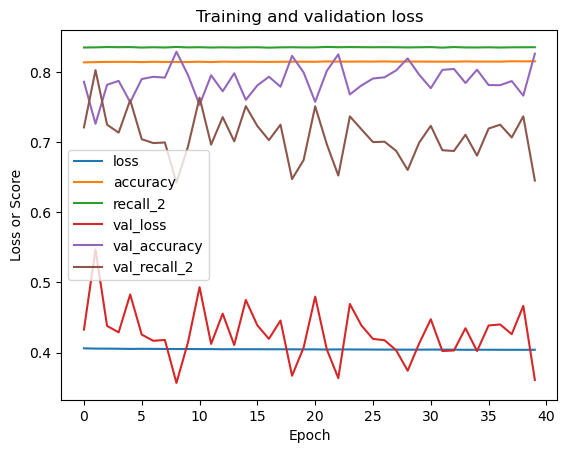

In [784]:
df_base_keras_model.plot();
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss or Score');
### Validation recall since to be going down so the model could be overfitting.

In [646]:
keras_model.evaluate(X_test_preprocessed,y_test)
# Fisrt value is lost, second is accuracy, third is recall

3126/3126 [==============================] - 2s 714us/step - loss: 0.3635 - accuracy: 0.8265 - recall_2: 0.6394


[0.36348757147789, 0.8264885544776917, 0.6393670439720154]

In [ ]:
### Second model dropping 50% of neurons to see what happens.

In [677]:
# Define the model architecture

keras_model = Sequential()
keras_model.add(Dense(12, input_dim=42, activation='relu'))
keras_model.add(Dropout(0.5))
keras_model.add(Dense(1, activation='sigmoid'))
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall()])
keras_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 12)                516       
                                                                 
 dropout_20 (Dropout)        (None, 12)                0         
                                                                 
 dense_51 (Dense)            (None, 1)                 13        
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [678]:
history= keras_model.fit(X_train_resample,y_train_resampled, epochs= 20, validation_data=(X_val_preprocessed,y_val))

Epoch 1/20
18083/18083 [==============================] - 18s 986us/step - loss: 0.5039 - accuracy: 0.7647 - recall_13: 0.8215 - val_loss: 0.4739 - val_accuracy: 0.7509 - val_recall_13: 0.7817
Epoch 2/20
18083/18083 [==============================] - 18s 978us/step - loss: 0.4817 - accuracy: 0.7809 - recall_13: 0.8425 - val_loss: 0.4638 - val_accuracy: 0.7495 - val_recall_13: 0.7870
Epoch 3/20
18083/18083 [==============================] - 18s 981us/step - loss: 0.4798 - accuracy: 0.7814 - recall_13: 0.8450 - val_loss: 0.4707 - val_accuracy: 0.7473 - val_recall_13: 0.7837
Epoch 4/20
18083/18083 [==============================] - 18s 987us/step - loss: 0.4793 - accuracy: 0.7819 - recall_13: 0.8464 - val_loss: 0.5184 - val_accuracy: 0.7094 - val_recall_13: 0.8284
Epoch 5/20
18083/18083 [==============================] - 18s 988us/step - loss: 0.4777 - accuracy: 0.7827 - recall_13: 0.8472 - val_loss: 0.4609 - val_accuracy: 0.7523 - val_recall_13: 0.7850
Epoch 6/20
18083/18083 [===========

In [681]:
pd.DataFrame(history.history)

loss  accuracy  recall_13  val_loss  val_accuracy  val_recall_13
0   0.503930  0.764697   0.821469  0.473935      0.750870       0.781733
1   0.481731  0.780892   0.842466  0.463767      0.749530       0.786976
2   0.479764  0.781383   0.845038  0.470710      0.747321       0.783664
3   0.479274  0.781884   0.846365  0.518370      0.709351       0.828366
4   0.477720  0.782656   0.847222  0.460924      0.752339       0.785044
5   0.477684  0.783083   0.847755  0.440106      0.766755       0.765453
6   0.476467  0.783278   0.848636  0.426821      0.771184       0.758554
7   0.475227  0.784435   0.848557  0.445196      0.758048       0.766556
8   0.475346  0.784207   0.850074  0.430157      0.764876       0.765728
9   0.474612  0.784799   0.850036  0.462183      0.755908       0.770695
10  0.474222  0.784977   0.849891  0.449352      0.763926       0.766832
11  0.474147  0.784651   0.848767  0.458734      0.759207       0.765728
12  0.473782  0.785185   0.849645  0.463223      0.749980       0.786700
13  0.473377  0.785955   0.850274  0.442408      0.758278       0.770419
14  0.472632  0.785129   0.849770  0.463804      0.746711       0.785872
15  0.472399  0.785371   0.849701  0.452092      0.760387       0.772351
16  0.472707  0.785517   0.850223  0.454479      0.752479       0.779249
17  0.472921  0.785363   0.850544  0.452659      0.759117       0.770144
18  0.471892  0.785541   0.850153  0.419263      0.773923       0.749724
19  0.472343  0.785693   0.851491  0.438850      0.762826       0.765177

In [781]:
df_2nd_keras_model=pd.read_csv('2nd_model.csv',delimiter='\t', index_col=0)
# model result was saved as 2nd_model.csv

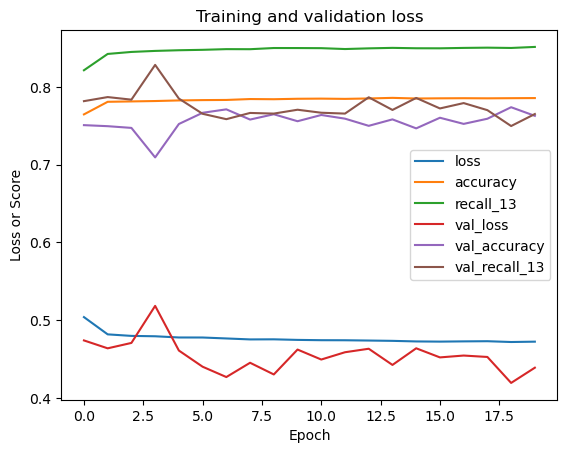

In [785]:
df_2nd_keras_model.plot()
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss or Score');

In [684]:
keras_model.evaluate(X_test_preprocessed,y_test)

3126/3126 [==============================] - 2s 735us/step - loss: 0.4397 - accuracy: 0.7639 - recall_13: 0.7696


[0.439742773771286, 0.7638860940933228, 0.7695724368095398]

## 2nd Keras model with 3 layers

In [656]:
keras_model_9_3 = Sequential()
keras_model_9_3.add(Dense(6, input_dim=42, activation='relu'))
keras_model_9_3.add(Dense(3, activation='relu'))
keras_model_9_3.add(Dense(1, activation='sigmoid'))
keras_model_9_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall()])

In [657]:
keras_model_9_3.summary()
# In this case we have 3 layers, one with 6 neurons, second with 3 nad the last for the classification decision

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 6)                 258       
                                                                 
 dense_24 (Dense)            (None, 3)                 21        
                                                                 
 dense_25 (Dense)            (None, 1)                 4         
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


In [648]:
history_9_3= keras_model_9_3.fit(X_train_resample,y_train_resampled, epochs= 20, validation_data=(X_val_preprocessed,y_val))

Epoch 1/20
18083/18083 [==============================] - 19s 1ms/step - loss: 0.4863 - accuracy: 0.7735 - recall_5: 0.8005 - val_loss: 0.4717 - val_accuracy: 0.7694 - val_recall_5: 0.7533
Epoch 2/20
18083/18083 [==============================] - 19s 1ms/step - loss: 0.4601 - accuracy: 0.7876 - recall_5: 0.8127 - val_loss: 0.5357 - val_accuracy: 0.7265 - val_recall_5: 0.8071
Epoch 3/20
18083/18083 [==============================] - 19s 1ms/step - loss: 0.4590 - accuracy: 0.7876 - recall_5: 0.8129 - val_loss: 0.4389 - val_accuracy: 0.7868 - val_recall_5: 0.7323
Epoch 4/20
18083/18083 [==============================] - 19s 1ms/step - loss: 0.4587 - accuracy: 0.7879 - recall_5: 0.8131 - val_loss: 0.5186 - val_accuracy: 0.7335 - val_recall_5: 0.7999
Epoch 5/20
18083/18083 [==============================] - 19s 1ms/step - loss: 0.4584 - accuracy: 0.7877 - recall_5: 0.8129 - val_loss: 0.5141 - val_accuracy: 0.7387 - val_recall_5: 0.7958
Epoch 6/20
18083/18083 [==============================]

In [650]:
pd.DataFrame(history_9_3.history)

loss  accuracy  recall_5  val_loss  val_accuracy  val_recall_5
0   0.486273  0.773462  0.800498  0.471720      0.769385      0.753311
1   0.460110  0.787577  0.812713  0.535677      0.726537      0.807119
2   0.459045  0.787554  0.812893  0.438945      0.786840      0.732340
3   0.458651  0.787941  0.813132  0.518555      0.733545      0.799945
4   0.458427  0.787660  0.812914  0.514083      0.738673      0.795806
5   0.458204  0.787803  0.812827  0.454973      0.772494      0.752483
6   0.457922  0.787979  0.812368  0.476639      0.761797      0.769592
7   0.457750  0.787959  0.813049  0.461785      0.769674      0.758002
8   0.457455  0.788176  0.813519  0.516138      0.738873      0.795530
9   0.457388  0.788346  0.814570  0.496432      0.748780      0.783113
10  0.457230  0.788024  0.813543  0.454626      0.775423      0.748620
11  0.457054  0.788216  0.814310  0.517687      0.737963      0.798565
12  0.456734  0.788216  0.814348  0.484165      0.754439      0.776766
13  0.455370  0.789324  0.814148  0.460464      0.775323      0.745585
14  0.452873  0.791462  0.812575  0.460935      0.775483      0.743102
15  0.452135  0.791567  0.811594  0.458737      0.776473      0.744481
16  0.451347  0.791491  0.812022  0.474538      0.767005      0.757726
17  0.450818  0.792303  0.812205  0.476350      0.769035      0.750828
18  0.450477  0.792645  0.811041  0.450970      0.782591      0.738962
19  0.450191  0.792770  0.809084  0.449859      0.787400      0.729029

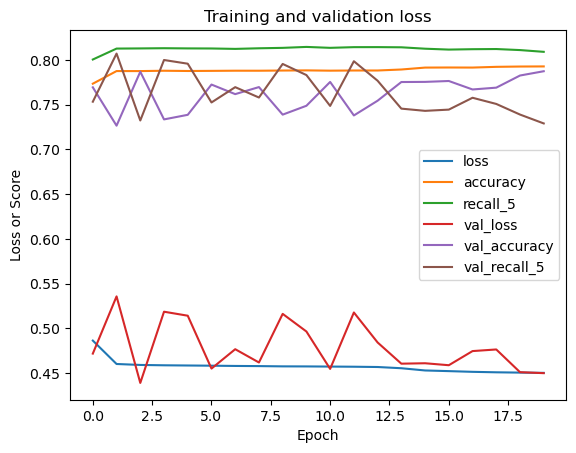

In [786]:
pd.DataFrame(history_9_3.history).plot()
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss or Score');

# It seems that with 3 layers the model is overfitting less

In [651]:
keras_model_9_3.evaluate(X_test_preprocessed,y_test)

3126/3126 [==============================] - 2s 739us/step - loss: 0.4506 - accuracy: 0.7888 - recall_5: 0.7404


[0.4506392180919647, 0.788759171962738, 0.7404220104217529]

### Dropping a third of neurons for the second keras model

In [667]:
keras_model_9_3_drop = Sequential()
keras_model_9_3_drop.add(Dense(6, input_dim=42, activation='relu'))
keras_model_9_3_drop.add(Dropout(0.333))
keras_model_9_3_drop.add(Dense(3, activation='relu'))
keras_model_9_3_drop.add(Dropout(0.333))
keras_model_9_3_drop.add(Dense(1, activation='sigmoid'))
keras_model_9_3_drop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall()])
keras_model_9_3_drop.summary()
#Dropping a third of neurons to see if it helps

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 6)                 258       
                                                                 
 dropout_12 (Dropout)        (None, 6)                 0         
                                                                 
 dense_42 (Dense)            (None, 3)                 21        
                                                                 
 dropout_13 (Dropout)        (None, 3)                 0         
                                                                 
 dense_43 (Dense)            (None, 1)                 4         
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


In [668]:
history_9_3_drop= keras_model_9_3_drop.fit(X_train_resample,y_train_resampled, epochs= 20, validation_data=(X_val_preprocessed,y_val))

Epoch 1/20
18083/18083 [==============================] - 20s 1ms/step - loss: 0.5593 - accuracy: 0.7080 - recall_9: 0.6473 - val_loss: 0.5053 - val_accuracy: 0.7413 - val_recall_9: 0.7922
Epoch 2/20
18083/18083 [==============================] - 19s 1ms/step - loss: 0.5386 - accuracy: 0.7282 - recall_9: 0.6569 - val_loss: 0.4639 - val_accuracy: 0.7744 - val_recall_9: 0.7514
Epoch 3/20
18083/18083 [==============================] - 20s 1ms/step - loss: 0.5362 - accuracy: 0.7288 - recall_9: 0.6557 - val_loss: 0.4536 - val_accuracy: 0.7796 - val_recall_9: 0.7459
Epoch 4/20
18083/18083 [==============================] - 20s 1ms/step - loss: 0.5358 - accuracy: 0.7296 - recall_9: 0.6548 - val_loss: 0.4754 - val_accuracy: 0.7642 - val_recall_9: 0.7712
Epoch 5/20
18083/18083 [==============================] - 19s 1ms/step - loss: 0.5357 - accuracy: 0.7297 - recall_9: 0.6538 - val_loss: 0.4362 - val_accuracy: 0.8027 - val_recall_9: 0.7081
Epoch 6/20
18083/18083 [==============================]

In [670]:
pd.DataFrame(history_9_3_drop.history)

loss  accuracy  recall_9  val_loss  val_accuracy  val_recall_9
0   0.559315  0.707989  0.647344  0.505297      0.741282      0.792219
1   0.538551  0.728218  0.656932  0.463894      0.774403      0.751380
2   0.536193  0.728767  0.655712  0.453613      0.779632      0.745861
3   0.535798  0.729600  0.654786  0.475359      0.764176      0.771247
4   0.535679  0.729716  0.653770  0.436232      0.802725      0.708057
5   0.534913  0.730248  0.651948  0.421837      0.810683      0.692053
6   0.534094  0.730530  0.651831  0.421765      0.808744      0.701987
7   0.534597  0.730440  0.652498  0.398334      0.829338      0.638521
8   0.534593  0.730568  0.652473  0.458973      0.788379      0.724062
9   0.534033  0.730577  0.650877  0.437658      0.813472      0.688742
10  0.533799  0.731453  0.653327  0.396507      0.822000      0.669150
11  0.532788  0.731615  0.655211  0.416950      0.814952      0.686810
12  0.533938  0.730889  0.651768  0.449656      0.802795      0.708057
13  0.533181  0.732004  0.654015  0.440653      0.810333      0.706126
14  0.533671  0.731553  0.651886  0.415474      0.832747      0.642936
15  0.533184  0.731868  0.652726  0.425346      0.809473      0.703918
16  0.532627  0.732626  0.653611  0.395578      0.847463      0.610927
17  0.533080  0.731919  0.651277  0.404291      0.810433      0.692605
18  0.531983  0.732547  0.652888  0.450409      0.801856      0.711645
19  0.532861  0.731781  0.654537  0.426585      0.812143      0.685706

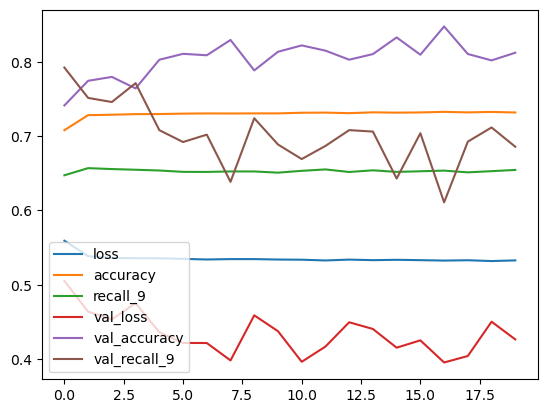

In [672]:
pd.DataFrame(history_9_3_drop.history).plot()
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss or Score');
# Dropping a third of neurons was too much in this case, the model performs better without dropping.

### Best deep learning model
- The recall is close to 0.7, this could be improved with more epoches in the model with 3 layers without dropping neurons.
- However, the linear regression model is easier to interpret and run.

In [788]:
keras_model_9_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 6)                 258       
                                                                 
 dense_24 (Dense)            (None, 3)                 21        
                                                                 
 dense_25 (Dense)            (None, 1)                 4         
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


In [791]:
keras_model_9_3.evaluate(X_test_preprocessed,y_test)


3126/3126 [==============================] - 2s 772us/step - loss: 0.7533 - accuracy: 0.1540 - recall_6: 0.6932


[0.7533131837844849, 0.15397688746452332, 0.6932259798049927]

# 13.Conclusion
[Back to top](#Table-of-Contents)

In [ ]:
Name of the best model Best_LR_pipeline.

In [831]:
print("Best score: ", LR_gs.best_score_)
print("Best parameters: ", LR_gs.best_params_)
#getting score and parameters

Best score:  0.7621792556733478
Best parameters:  {'model__C': 0.1, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


The best model is a Logistic Regression with the following parameters:
- Best parameters:  {'model__C': 0.1, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
- The average recall score is 0.76 and it has a standard deviation of 0.006.

- The model proposed by Turiel, J. & Aste, T.had a recall of 77.4% which is close to the model I got here.

This model will correctly identify 76% of all positive cases (i.e., the cases where the loan is actually delinquent). In other words, the  model has the ability to avoid false negatives, or cases where the model incorrectly predicts that a loan is not delinquent when it actually is.

However, it has a precision score of 0.11 means that out of all the loans predicted as delinquent by the model, only 11% were actually delinquent. In other words, the model is not very precise in identifying delinquent loans and is likely to generate a lot of false positives (i.e., cases where the model predicts that a loan is delinquent when it actually is not).

One of the advantages of using a logistic regression model is its interpretability, which makes it compliant with the Fair Housing Act. The Act prohibits discrimination in the sale, rental, and financing of housing based on certain protected characteristics, such as race, color, national origin, religion, sex, familial status, and disability. Therefore, it is important for lenders to ensure that their models do not discriminate against any protected groups. Logistic regression models are easier to interpret than other models like neural networks, which can be seen as "black boxes" due to their complex architecture. By using a logistic regression model, lenders can better understand which features are driving the model's predictions and ensure that they are not inadvertently discriminating against any protected groups.





### For future research
- Turiel, J. & Aste recommend using Deep Learning models to improve the precision in the model, however how this will comply with the Fair Housing Act is not clear.

# 14.Saving Model
[Back to top](#Table-of-Contents)

In [834]:
dump(Best_LR_pipeline, 'delinquent_model.joblib')

['delinquent_model.joblib']

# 15.Bonus
[Back to top](#Table-of-Contents)
### What if we only have the numeric columns?
- In my experience working with clients, not all the information is always available, especially for categorical columns as it often depends on the loan type and seller. However, the numeric features play an essential role in loan approval. Therefore, a simplistic model that only includes numeric values makes sense in this case.

In [836]:
numerical_cols=['CREDIT_SCORE','MORTGAGE_INSURANCE_PERCENTAGE','ORIGINAL_COMBINED_LOAN_TO_VALUE','ORIGINAL_DEBT_TO_INCOME_RATIO',
              'ORIGINAL_UPB','ORIGINAL_LOAN_TO_VALUE','ORIGINAL_INTEREST_RATE','ORIGINAL_LOAN_TERM']
X=df[numerical_cols]
y=df['DELINQUENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [837]:
Simplistic_LR_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()) ,#calling preprocessor
    ('oversampler', SMOTE()), #Using SMOTE as oversampler
    ('model', LogisticRegression(max_iter=1000)) # Base Model no Hyper Tuning
])


In [838]:
Simplistic_LR_pipeline.fit(X_train,y_train)

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', RobustScaler()),
                ('oversampler', SMOTE()),
                ('model', LogisticRegression(max_iter=1000))])

In [839]:
y_pred= Simplistic_LR_pipeline.predict(X_test)

In [840]:
print(classification_report(y_test,y_pred)) 
# Great recall of 0.75

              precision    recall  f1-score   support

       False       0.99      0.72      0.83     96426
        True       0.09      0.75      0.16      3602

    accuracy                           0.72    100028
   macro avg       0.54      0.73      0.49    100028
weighted avg       0.95      0.72      0.81    100028



### Saving simplistic model

In [841]:
dump(Simplistic_LR_pipeline, 'simple_delinquent_model.joblib')

['simple_delinquent_model.joblib']

# 16.Glossary Terms
[Back to top](#Table-of-Contents)

- First Payment Year: The year when the loan was originated. Data shows predominant values from 1999 to 2002.
- First Payment Month: The month when the first payment was made.
- Maturity Date Year: The end year of the original loan term.
- Maturity Date Month: The end month of the original loan.
- Loan Term: The great majority of loans are 360 months or 30 years.
- Credit Score: A number prepared by third parties summarizing the borrower’s creditworthiness, which may be indicative of the likelihood that the borrower will timely repay future obligations.
- Mortgage Insurance Percentage: The percentage of loss coverage on the loan at the time of Freddie Mac’s purchase of the mortgage loan that a mortgage insurer is providing to cover losses incurred as a result of a default on the loan.
- Original Combined Loan to Value: The ratio obtained by dividing the original mortgage loan amount on the note date plus any secondary mortgage loan amount disclosed by the Seller by the mortgaged property’s appraised value on the note date.
- Debt-to-Income Ratio: Disclosure of the debt-to-income ratio is based on the borrower's monthly debt payments divided by the total monthly income.
- UPB: Stands for "unpaid principal balance," which is the amount of principal remaining on a loan that has not yet been paid back.
- Original Loan-to-Value (LTV): In the case of a purchase mortgage loan, the ratio obtained by dividing the original mortgage loan amount on the note date by the lesser of the mortgaged property’s appraised value on the note date or its purchase price.
- First Time Homebuyer: A label to identify if it is the first customer property.
- Number of Units: Denotes whether the mortgage is a one-, two-, three-, or four-unit property.
- Metropolitan Statistical Areas (MSAs): Are defined by the United States Office of Management and Budget (OMB) and have at least one urbanized area with a population of 50,000 or more inhabitants.
- Occupancy Status: Denotes whether the mortgage type is owner-occupied, second home, or investment property.
- Channel: The type of organization from which the loan was originated. R = Retail, B = Broker, C = Correspondent, T = TPO Not Specified.
- Prepayment Penalty: Obligated to pay a penalty in the event of certain repayments of principal.
- Property Type: Denotes whether the property type secured by the mortgage is a condominium, leasehold, planned unit development (PUD), cooperative share, manufactured home, or single-family home.
- Loan Purpose: Indicates whether the mortgage loan is a cash-out refinance mortgage, no cash-out refinance mortgage, or a purchase mortgage.
    - A cash-out refinance mortgage loan is a mortgage loan in which the use of the loan amount is not limited to specific purposes.
    - A no cash-out refinance mortgage loan is a mortgage loan in which the loan amount is limited to the following uses:
        - Pay off the first mortgage, regardless of its age.
        - Pay off any junior liens secured by the mortgaged property that were used in their entirety to acquire the subject property.
        - Pay related closing costs, financing costs, and prepaid items.
    - A purchase mortgage is when the borrower is seeking to obtain financing for a new home purchase, and the mortgage is secured by the property being purchased.